<a href="https://colab.research.google.com/github/alllioooooo/kronbars-teams/blob/main/kronbars_teams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорты

In [ ]:
from google.colab import auth
from google.auth import default
import gspread
from gspread_dataframe import get_as_dataframe
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind, pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install optuna
import optuna
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from itertools import combinations
from IPython.display import display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.8/231.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.0 MB/s eta 0:00:00


# Загрузка данных

In [ ]:
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
spreadsheet_id = "19tEF31L7hUWfy-6RjQ7mYjwgDIghZ4NbkEG6WkQXWb8"
spreadsheet = gc.open_by_key(spreadsheet_id)

worksheet = spreadsheet.sheet1

df = get_as_dataframe(worksheet, evaluate_formulas=True)

df

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,Ср. балл Контракт,Математика,Русский язык,На выбор,Магистратура ср. балл диплома
0,Бадминтон,6.0,1.0,1.0,0.0,5.0,4.0,1.0,нет,нет,нет,нет,нет,нет,4.81
1,Бильярд,13.0,4.0,1.0,3.0,8.0,8.0,0.0,77.89,нет,77.89,82,77.67,74,4.38
2,Вбокс,1.0,0.0,0.0,0.0,1.0,1.0,0.0,нет,нет,нет,нет,нет,нет,3.91
3,Водное поло,14.0,6.0,4.0,2.0,7.0,7.0,0.0,81.08,85.71,71.83,81,83.5,80.67,4.65
4,Гандбол,9.0,5.0,3.0,2.0,4.0,4.0,0.0,82.33,85.89,77,84.4,79.4,83,4.28
5,Гребной спорт,38.0,27.0,20.0,7.0,11.0,11.0,0.0,81.77,84.47,74.05,79.93,82.59,83.08,4.52
6,Дартс,1.0,0.0,0.0,0.0,1.0,1.0,0.0,нет,нет,нет,нет,нет,нет,4.83
7,Алтимат (женский),8.0,5.0,3.0,2.0,2.0,2.0,0.0,85.27,90.33,77.67,82.8,89,81.25,4.51
8,Волейбол (женский),11.0,10.0,5.0,5.0,1.0,1.0,0.0,81.87,86.73,77,78.2,85.5,81.9,4.61
9,Мини-футбол (женский),5.0,3.0,3.0,0.0,2.0,2.0,0.0,87.22,87.22,нет,84.67,91.67,85.33,4.63


# Предобработка данных + графики

In [ ]:
df_cleaned = df.replace("нет", np.nan)

<ipython-input-5-b30e53abe3a0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cleaned = df.replace("нет", np.nan)


Уберем клубы, в которых меньше 4х людей

In [ ]:
df_cleaned = df_cleaned[df_cleaned["Кол-во спортсменов"] >= 3].reset_index(drop=True)

Посмотрим на распределение студентов по клубам:

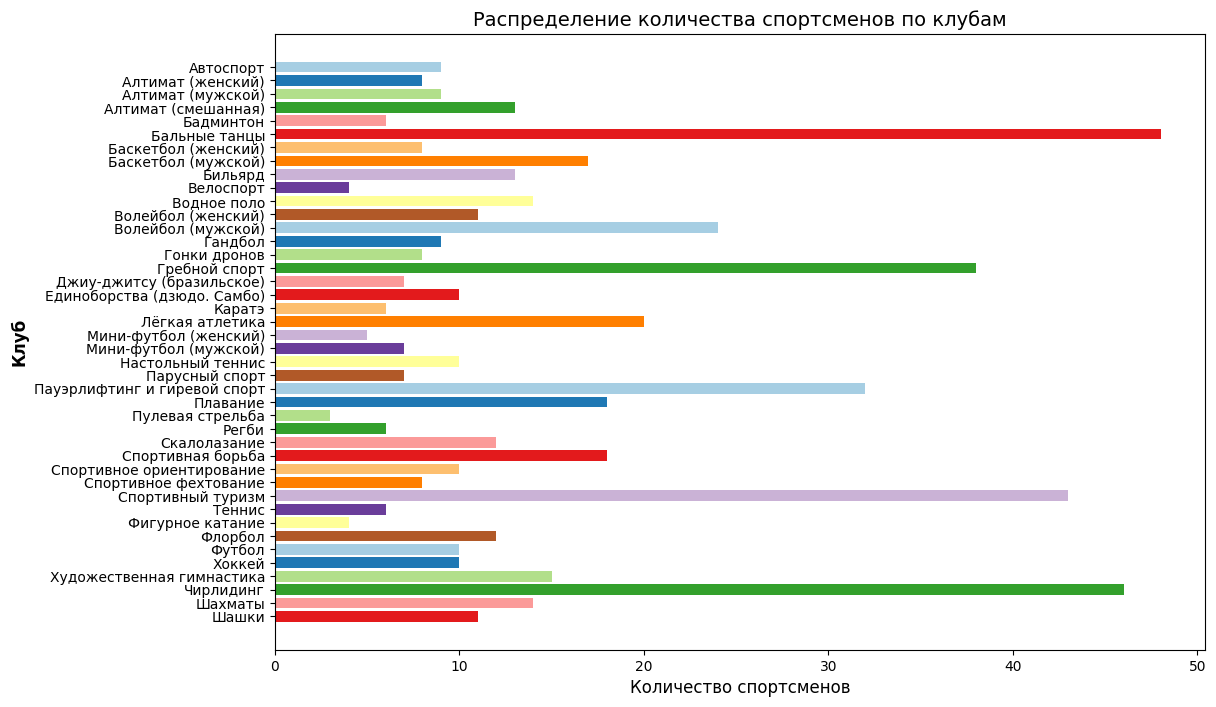

In [ ]:
club_counts = df_cleaned.groupby("Клуб")["Кол-во спортсменов"].sum()

plt.figure(figsize=(12, 8))
plt.barh(club_counts.index, club_counts.values, color=plt.cm.Paired.colors)

plt.xlabel("Количество спортсменов", fontsize=12)
plt.ylabel("Клуб", fontsize=12, fontweight='bold')
plt.title("Распределение количества спортсменов по клубам", fontsize=14)

plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Отсортируем по количеству людей от большего к меньшему:

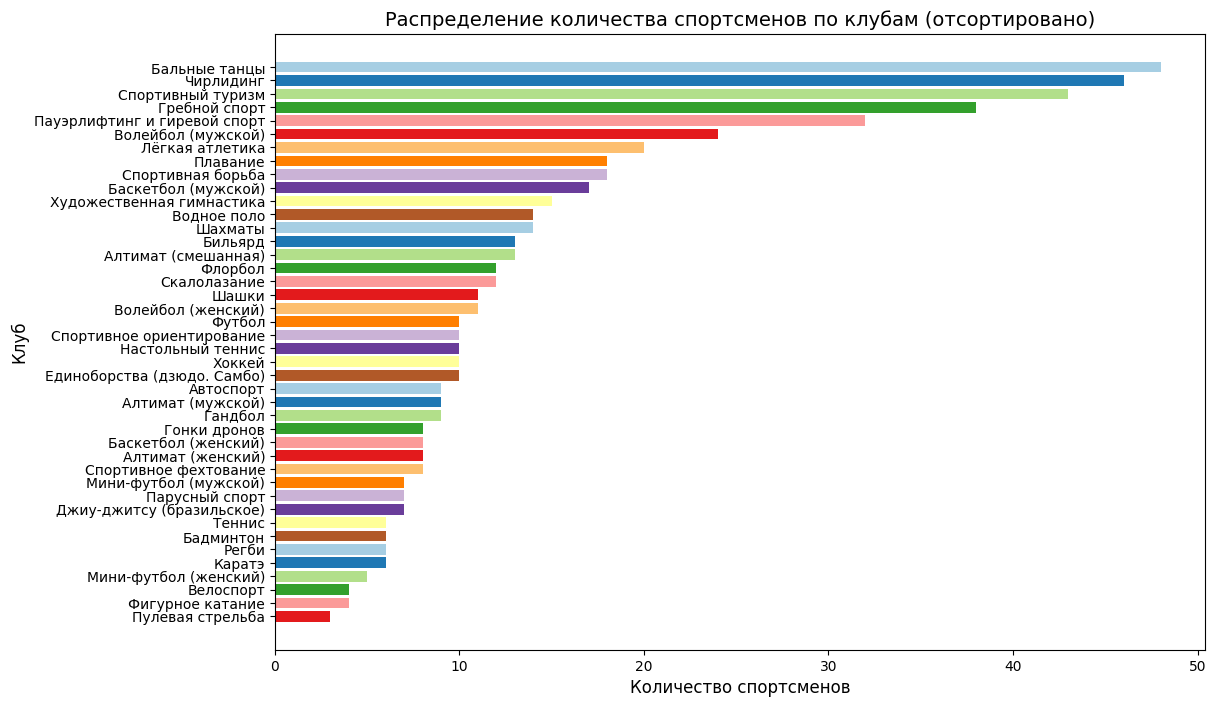

In [ ]:
club_counts_sorted = club_counts.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(club_counts_sorted.index, club_counts_sorted.values, color=plt.cm.Paired.colors)

plt.xlabel("Количество спортсменов", fontsize=12)
plt.ylabel("Клуб", fontsize=12)
plt.title("Распределение количества спортсменов по клубам (отсортировано)", fontsize=14)

plt.gca().invert_yaxis()
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

Посмотрим отдельно на процентное соотношение бюджетников и контрактников среди бакалавров и магистров

In [ ]:
df_cleaned["% Бюджет Всего"] = ((df_cleaned["Бюджет"] + df_cleaned["Бюджет.1"]) /
                                 (df_cleaned["Бюджет"] + df_cleaned["Бюджет.1"] + df_cleaned["Контракт"] + df_cleaned["Контракт.1"])) * 100

df_cleaned["% Контракт Всего"] = ((df_cleaned["Контракт"] + df_cleaned["Контракт.1"]) /
                                   (df_cleaned["Бюджет"] + df_cleaned["Бюджет.1"] + df_cleaned["Контракт"] + df_cleaned["Контракт.1"])) * 100

df_cleaned[["Клуб", "% Бюджет Всего", "% Контракт Всего"]]

,Клуб,% Бюджет Всего,% Контракт Всего
0,Бадминтон,83.333333,16.666667
1,Бильярд,75.000000,25.000000
2,Водное поло,84.615385,15.384615
3,Гандбол,77.777778,22.222222
4,Гребной спорт,81.578947,18.421053
5,Алтимат (женский),71.428571,28.571429
6,Волейбол (женский),54.545455,45.454545
7,Мини-футбол (женский),100.000000,0.000000
8,Баскетбол (женский),62.500000,37.500000
9,Автоспорт,66.666667,33.333333


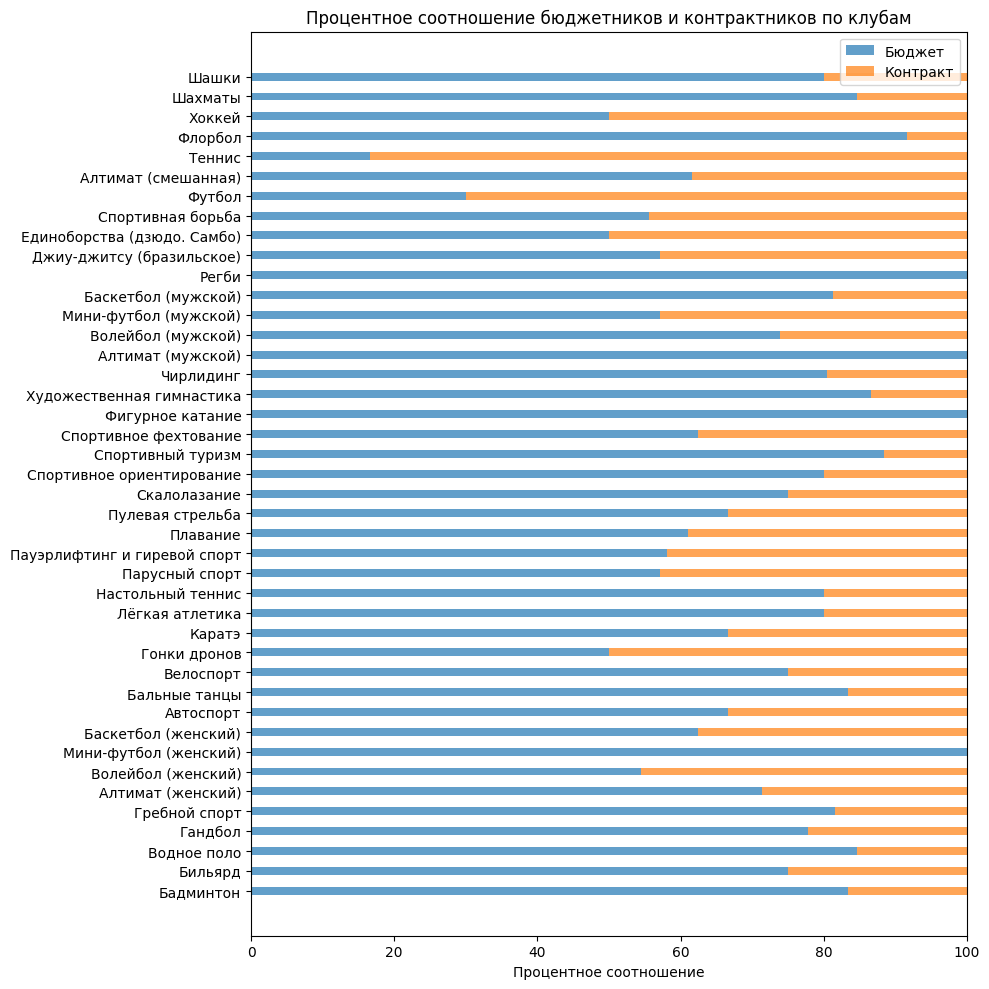

In [ ]:
plt.figure(figsize=(10, 10))
clubs = df_cleaned["Клуб"]
budget_percent = df_cleaned["% Бюджет Всего"]
contract_percent = df_cleaned["% Контракт Всего"]

bar_width = 0.4
y = range(len(clubs))

plt.barh(y, budget_percent, height=bar_width, label="Бюджет", alpha=0.7)
plt.barh(y, contract_percent, height=bar_width, left=budget_percent, label="Контракт", alpha=0.7)

plt.yticks(ticks=y, labels=clubs)
plt.xlabel("Процентное соотношение")
plt.title("Процентное соотношение бюджетников и контрактников по клубам")
plt.legend()
plt.tight_layout()

plt.show()

Попробуем отсортировать чтобыв начале у нас были те клубы, где больше всего бюджетников

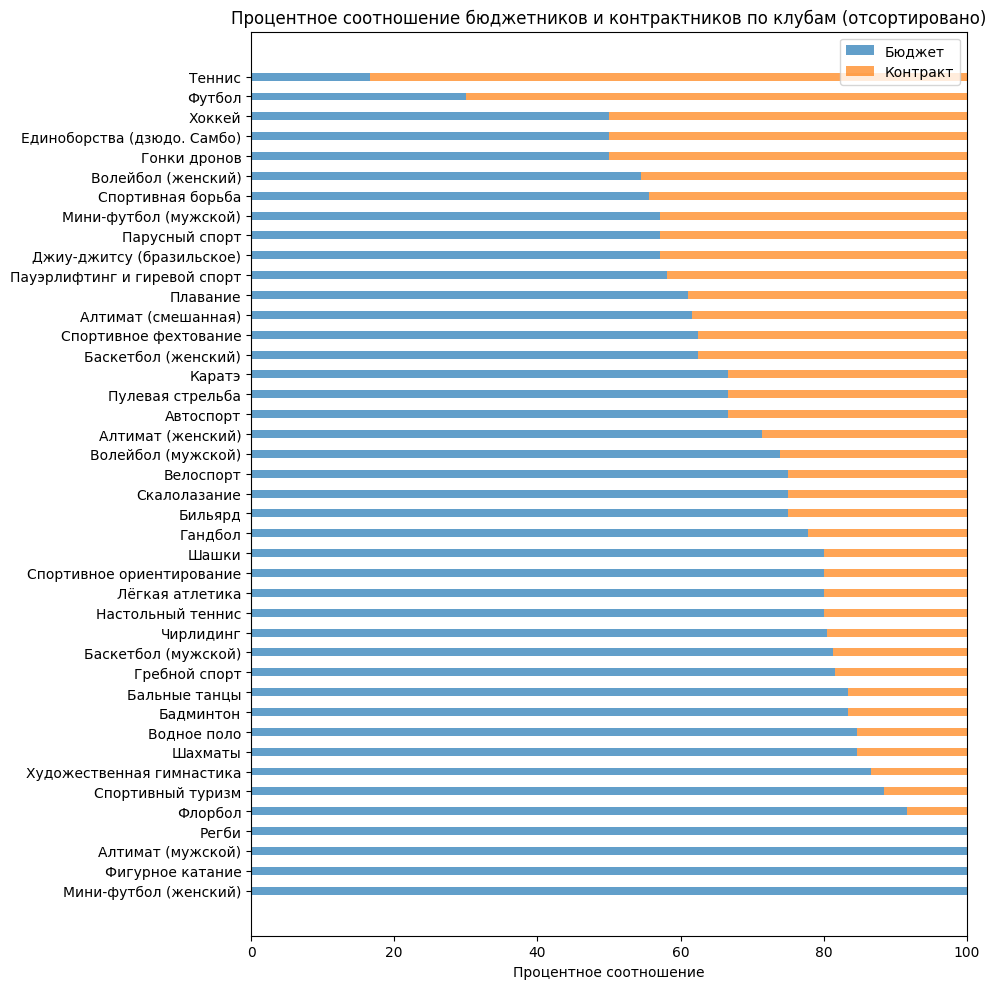

In [ ]:
df_sorted = df_cleaned.sort_values(by="% Бюджет Всего", ascending=False)

plt.figure(figsize=(10, 10))
clubs_sorted = df_sorted["Клуб"]
budget_percent_sorted = df_sorted["% Бюджет Всего"]
contract_percent_sorted = df_sorted["% Контракт Всего"]

bar_width = 0.4
y_sorted = range(len(clubs_sorted))

plt.barh(y_sorted, budget_percent_sorted, height=bar_width, label="Бюджет", alpha=0.7)
plt.barh(y_sorted, contract_percent_sorted, height=bar_width, left=budget_percent_sorted, label="Контракт", alpha=0.7)

plt.yticks(ticks=y_sorted, labels=clubs_sorted)
plt.xlabel("Процентное соотношение")
plt.title("Процентное соотношение бюджетников и контрактников по клубам (отсортировано)")
plt.legend()
plt.tight_layout()

plt.show()

Попробуем теперь добавить ***взвешенные коэффициенты***, которые помогут более объективно оценить ситуацию по соотношению количества людей к процентам бюджетников и платников:

- **Взвешенный процент бюджетников**:

  $$
  W_{\text{бюджет}} = \text{Кол-во спортсменов} \times \frac{\%
  \ \text{Бюджетников}}{100}
  $$

- **Взвешенный процент контрактников**:

  $$
  W_{\text{контракт}} = \text{Кол-во спортсменов} \times \frac{\% \  \text{Контрактников}}{100}
  $$

- **Коэффициент плотности бюджетников**:

  $$
  K_{\text{бюджет}} = \frac{\text{Кол-во бюджетников}}{\text{Кол-во спортсменов}}
  $$

Позже возможно эти данные помогут нам при кластеризации данных

In [ ]:
df_cleaned["Взвешенный % Бюджет"] = df_cleaned["Кол-во спортсменов"] * (df_cleaned["% Бюджет Всего"] / 100)
df_cleaned["Взвешенный % Контракт"] = df_cleaned["Кол-во спортсменов"] * (df_cleaned["% Контракт Всего"] / 100)
df_cleaned["Коэффициент плотности бюджетников"] = (df_cleaned["Бюджет"] + df_cleaned["Бюджет.1"]) / df_cleaned["Кол-во спортсменов"]

df_cleaned[["Клуб", "Кол-во спортсменов", "% Бюджет Всего", "% Контракт Всего", "Взвешенный % Бюджет", "Взвешенный % Контракт", "Коэффициент плотности бюджетников"]]


,Клуб,Кол-во спортсменов,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников
0,Бадминтон,6.0,83.333333,16.666667,5.000000,1.000000,0.833333
1,Бильярд,13.0,75.000000,25.000000,9.750000,3.250000,0.692308
2,Водное поло,14.0,84.615385,15.384615,11.846154,2.153846,0.785714
3,Гандбол,9.0,77.777778,22.222222,7.000000,2.000000,0.777778
4,Гребной спорт,38.0,81.578947,18.421053,31.000000,7.000000,0.815789
5,Алтимат (женский),8.0,71.428571,28.571429,5.714286,2.285714,0.625000
6,Волейбол (женский),11.0,54.545455,45.454545,6.000000,5.000000,0.545455
7,Мини-футбол (женский),5.0,100.000000,0.000000,5.000000,0.000000,1.000000
8,Баскетбол (женский),8.0,62.500000,37.500000,5.000000,3.000000,0.625000
9,Автоспорт,9.0,66.666667,33.333333,6.000000,3.000000,0.666667


По каждому коэффициенту отсортируем данные и выведем графики, чтобы посмотреть, есть ли там что то общее:

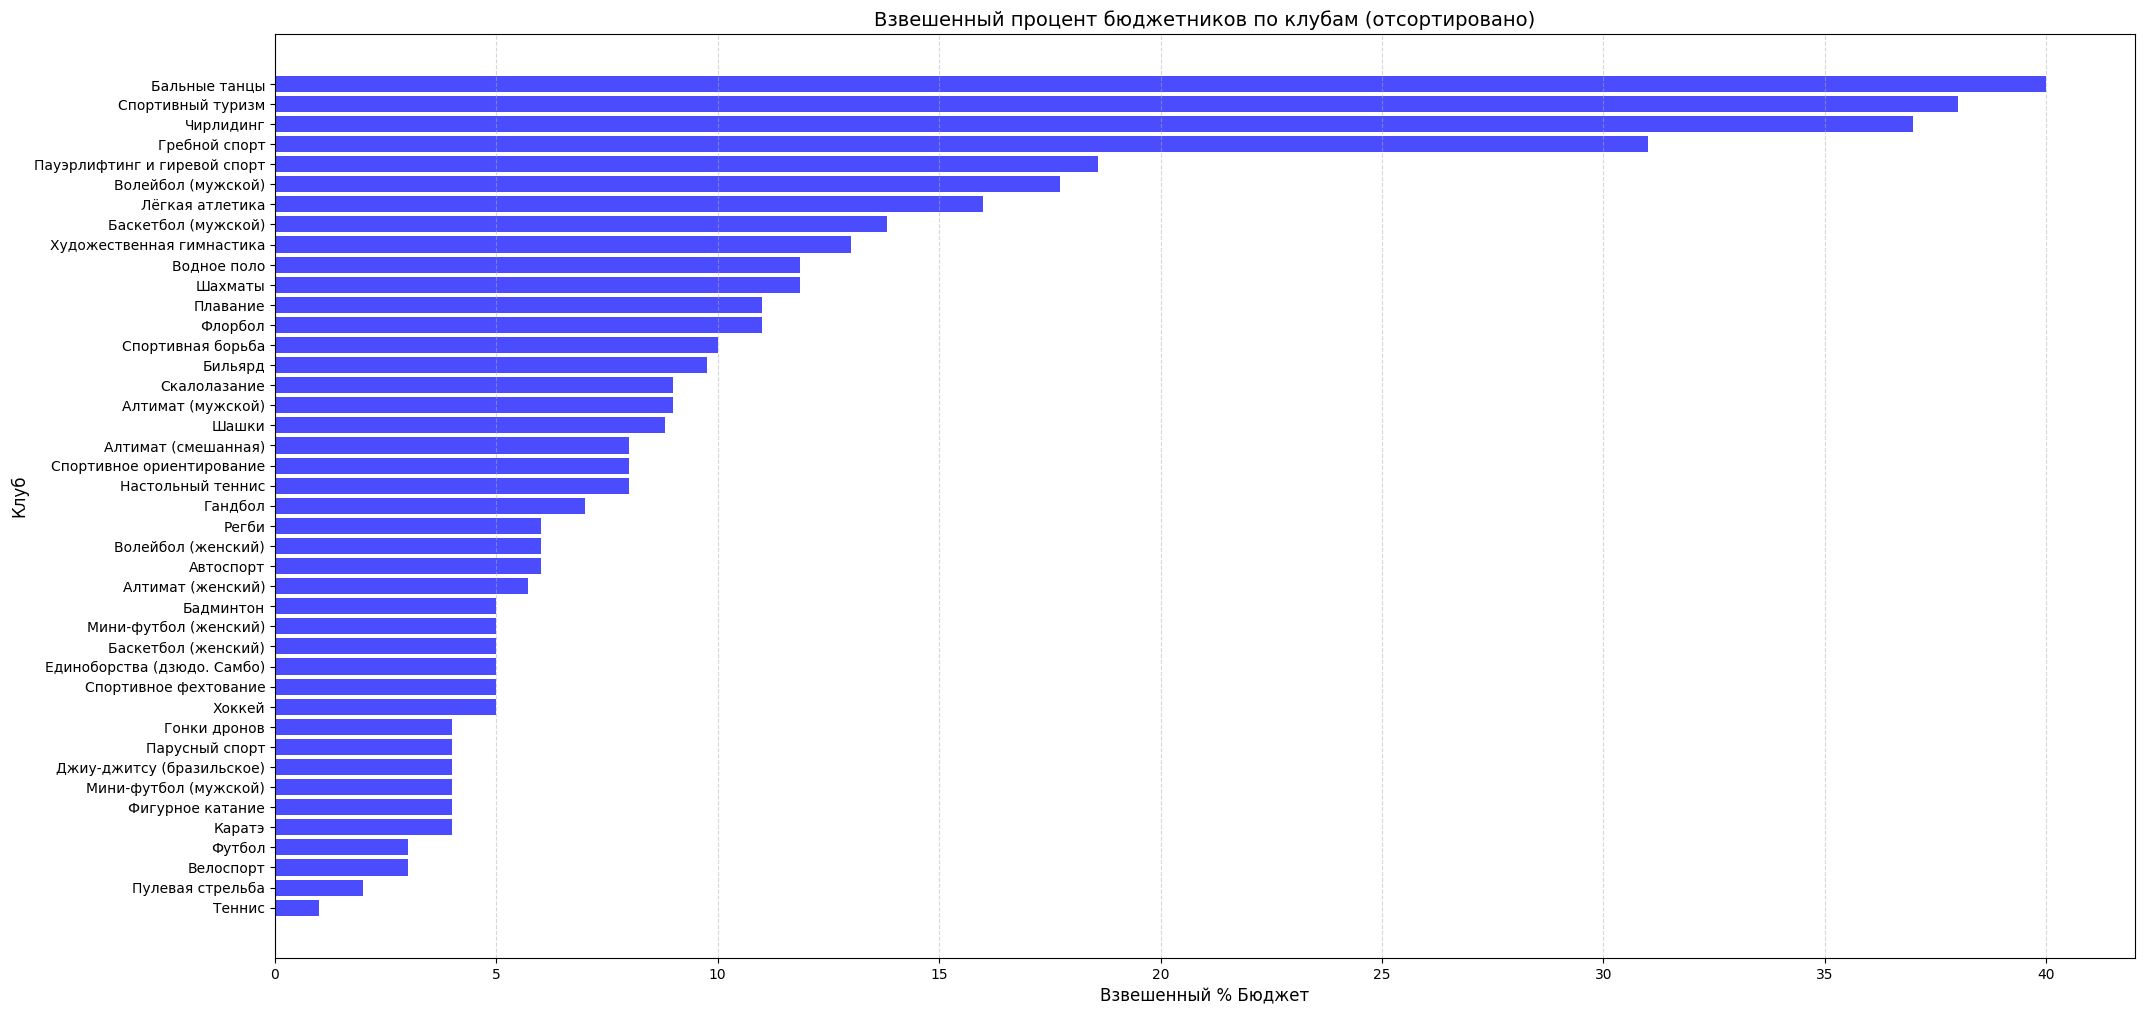

In [ ]:
df_sorted_budget = df_cleaned.sort_values(by="Взвешенный % Бюджет", ascending=False)

plt.figure(figsize=(24, 12))

plt.barh(df_sorted_budget["Клуб"], df_sorted_budget["Взвешенный % Бюджет"], color='blue', alpha=0.7)
plt.title("Взвешенный процент бюджетников по клубам (отсортировано)", fontsize=14)
plt.xlabel("Взвешенный % Бюджет", fontsize=12)
plt.ylabel("Клуб", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()

plt.show()

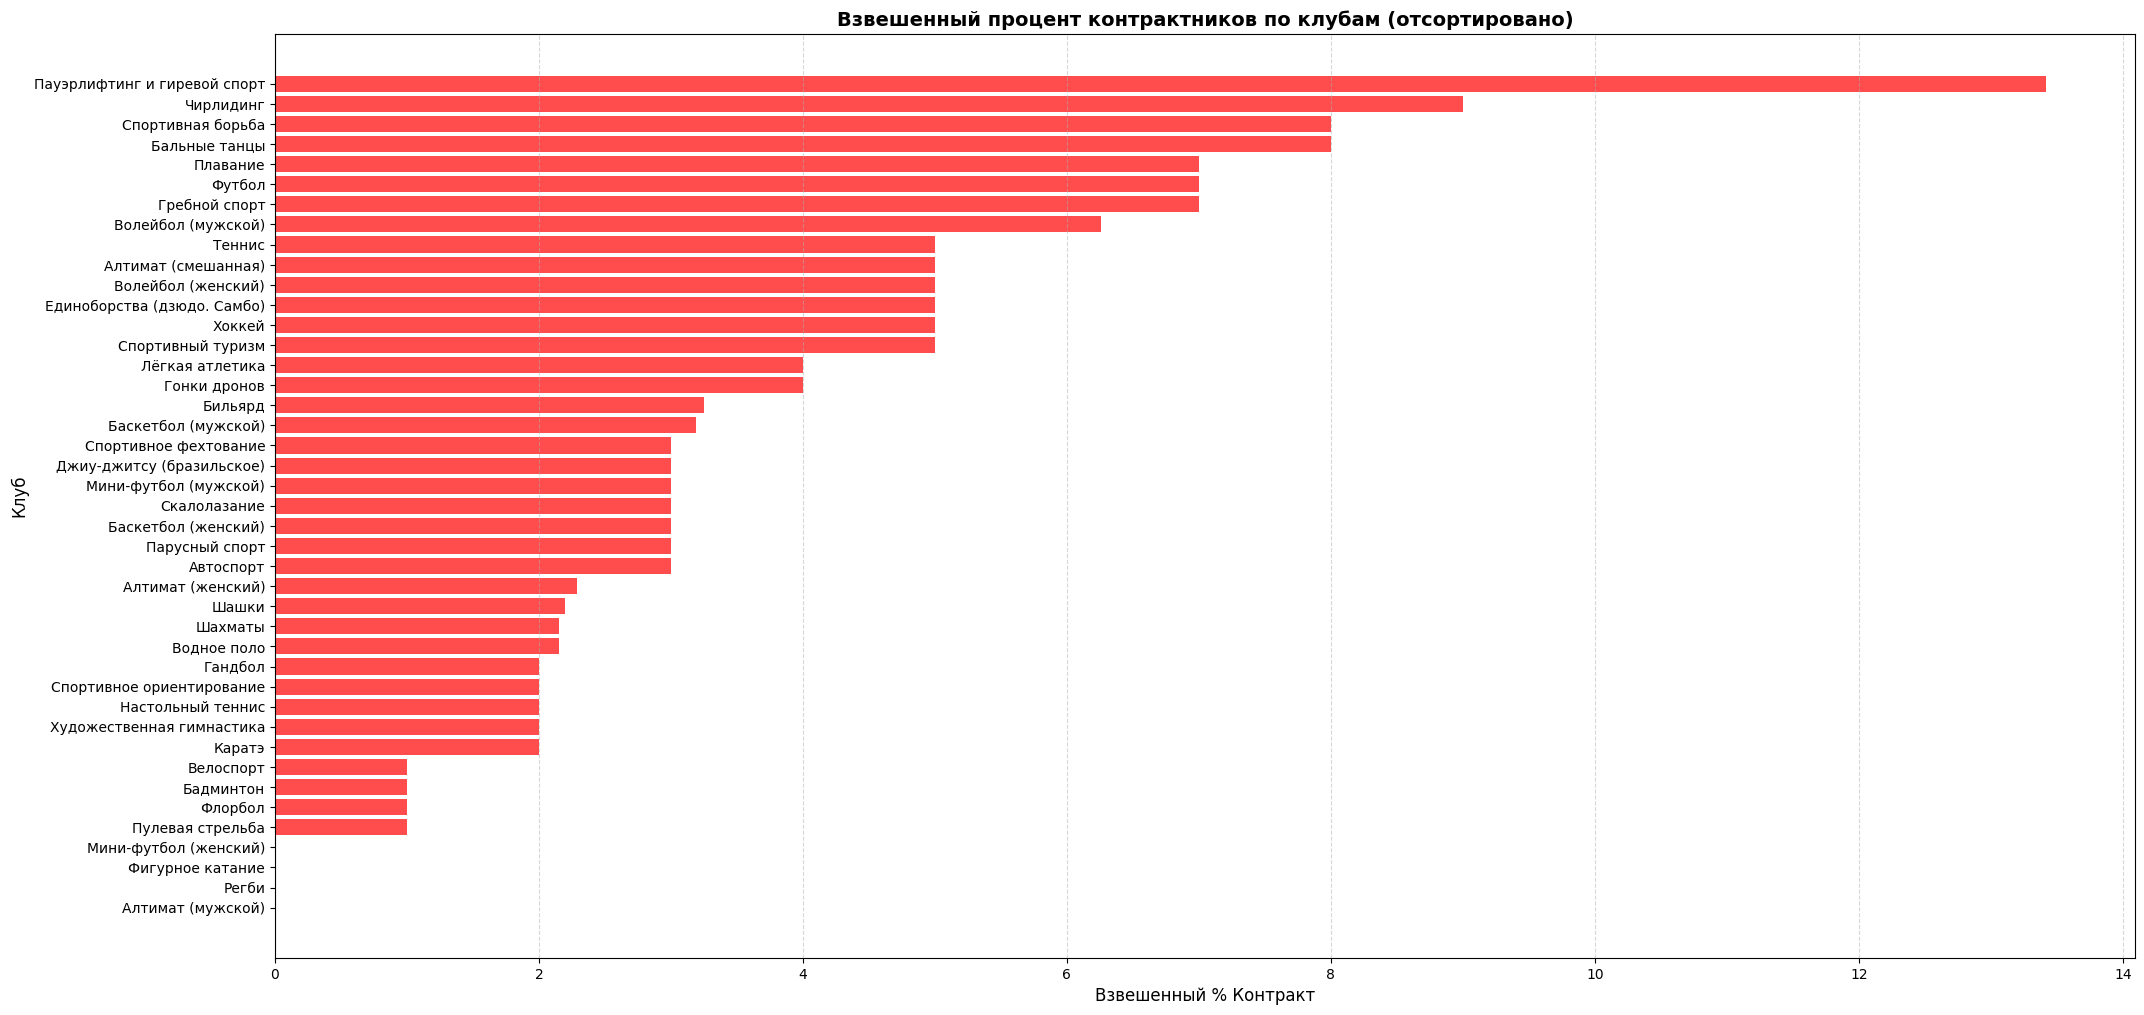

In [ ]:
df_sorted_contract = df_cleaned.sort_values(by="Взвешенный % Контракт", ascending=False)

plt.figure(figsize=(24, 12))

plt.barh(df_sorted_contract["Клуб"], df_sorted_contract["Взвешенный % Контракт"], color='red', alpha=0.7)
plt.title("Взвешенный процент контрактников по клубам (отсортировано)", fontsize=14, fontweight='bold')
plt.xlabel("Взвешенный % Контракт", fontsize=12)
plt.ylabel("Клуб", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()

plt.show()

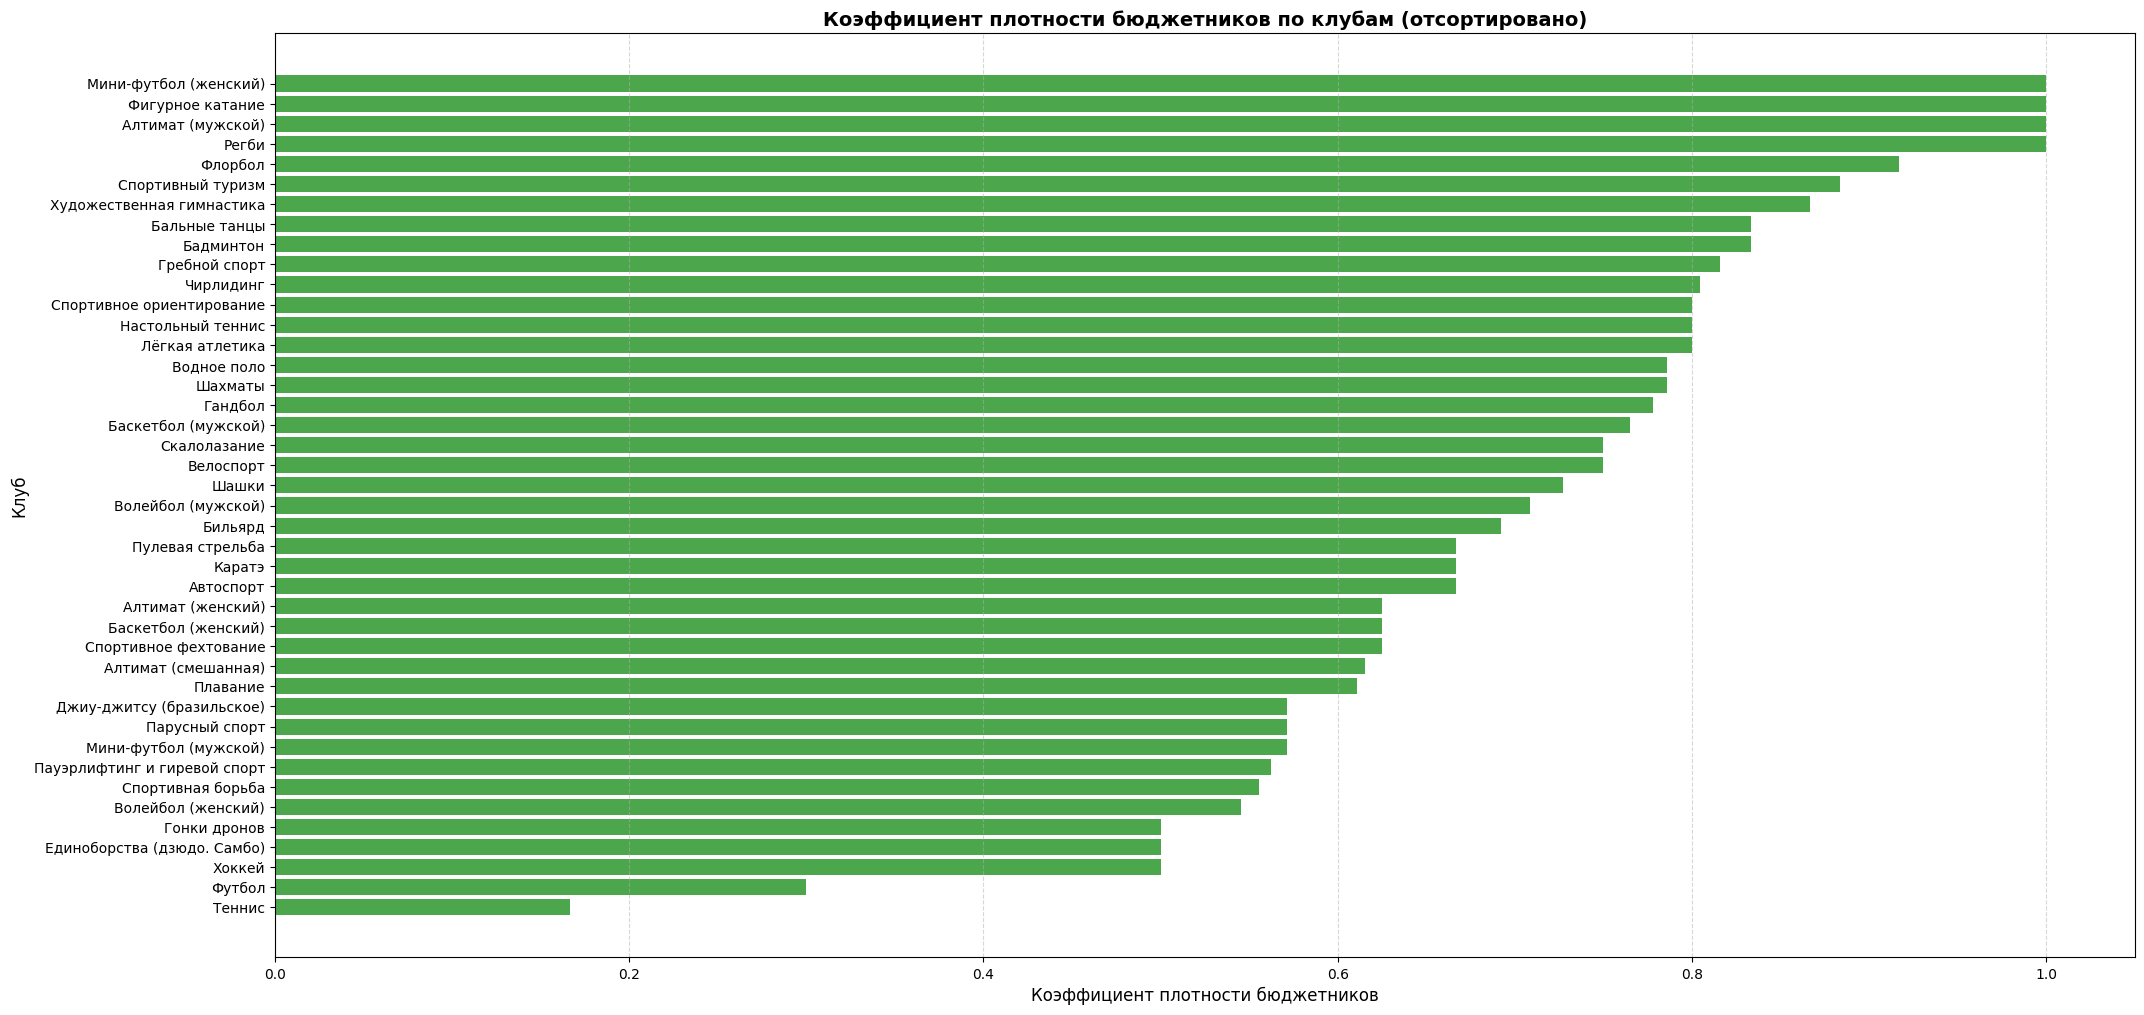

In [ ]:
df_sorted_density = df_cleaned.sort_values(by="Коэффициент плотности бюджетников", ascending=False)

plt.figure(figsize=(24, 12))

plt.barh(df_sorted_density["Клуб"], df_sorted_density["Коэффициент плотности бюджетников"], color='green', alpha=0.7)
plt.title("Коэффициент плотности бюджетников по клубам (отсортировано)", fontsize=14, fontweight='bold')
plt.xlabel("Коэффициент плотности бюджетников", fontsize=12)
plt.ylabel("Клуб", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.5)
plt.gca().invert_yaxis()

plt.show()

В целом взглянем на то, какое у нас соотношение людей по уровню образования:

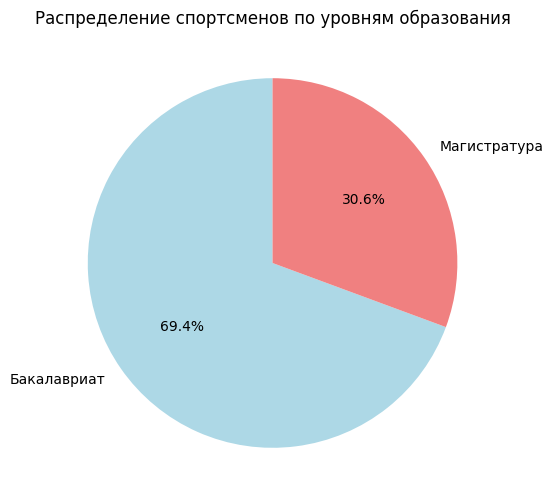

In [ ]:
edu_counts = df_cleaned[["Бакалавриат", "Магистратура"]].sum()

plt.figure(figsize=(6, 6))
plt.pie(edu_counts, labels=edu_counts.index, autopct='%1.1f%%', startangle=90, colors=["lightblue", "lightcoral"])
plt.title("Распределение спортсменов по уровням образования")

plt.show()

Для бакалавриата и магистратуры посмотрим распределение платников и бюджетников

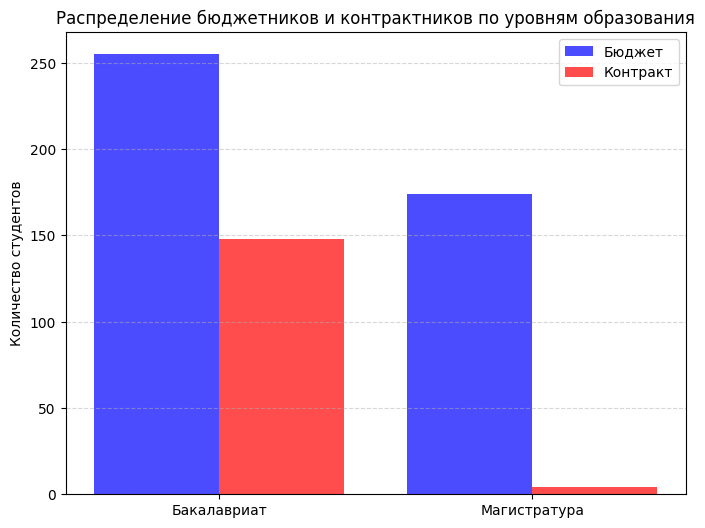

In [ ]:
bachelor_budget = df_cleaned["Бюджет"].sum()
bachelor_contract = df_cleaned["Контракт"].sum()
master_budget = df_cleaned["Бюджет.1"].sum()
master_contract = df_cleaned["Контракт.1"].sum()

labels = ["Бакалавриат", "Магистратура"]
budget_values = [bachelor_budget, master_budget]
contract_values = [bachelor_contract, master_contract]

x = np.arange(len(labels))
bar_width = 0.4

plt.figure(figsize=(8, 6))

plt.bar(x - bar_width/2, budget_values, width=bar_width, label="Бюджет", color="blue", alpha=0.7)
plt.bar(x + bar_width/2, contract_values, width=bar_width, label="Контракт", color="red", alpha=0.7)

plt.xticks(ticks=x, labels=labels)
plt.ylabel("Количество студентов")
plt.title("Распределение бюджетников и контрактников по уровням образования")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


Посмотрим, есть ли клубы, которые не интересны бюджетникам бакалавриата:

In [ ]:
df_no_budget_bachelor = df_cleaned[df_cleaned["Бюджет"] == 0]

df_no_budget_bachelor

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,Ср. балл Контракт,Математика,Русский язык,На выбор,Магистратура ср. балл диплома,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников
8,Баскетбол (женский),8.0,3.0,0.0,3.0,5.0,5.0,0.0,73.78,NaN,73.78,70.67,77.33,73.33,4.64,62.500000,37.500000,5.0,3.0,0.625000
37,Теннис,6.0,5.0,0.0,5.0,1.0,1.0,0.0,74.40,NaN,74.40,77.20,76.40,69.60,4.40,16.666667,83.333333,1.0,5.0,0.166667


Аналогично для магистров:

In [ ]:
df_no_budget_master = df_cleaned[df_cleaned["Бюджет.1"] == 0]

df_no_budget_master

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,Ср. балл Контракт,Математика,Русский язык,На выбор,Магистратура ср. балл диплома,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников
11,Велоспорт,4.0,4.0,3.0,1.0,0.0,0.0,0.0,83.83,86.89,74.67,84.0,86.25,81.25,NaN,75.000000,25.000000,3.0,1.0,0.750000
12,Гонки дронов,8.0,8.0,4.0,4.0,0.0,0.0,0.0,78.35,81.42,75.29,80.5,73.63,83.75,NaN,50.000000,50.000000,4.0,4.0,0.500000
19,Пулевая стрельба,3.0,3.0,2.0,1.0,0.0,0.0,0.0,81.22,92.67,75.50,76.0,81.67,86.00,NaN,66.666667,33.333333,2.0,1.0,0.666667


Посмотрим есть ли клубы где нет контрактников


Среди бакалавров:

In [ ]:
df_no_contract_bachelor = df_cleaned[df_cleaned["Контракт"] == 0]

df_no_contract_bachelor

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,Ср. балл Контракт,Математика,Русский язык,На выбор,Магистратура ср. балл диплома,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников
0,Бадминтон,6.0,1.0,1.0,0.0,5.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,4.81,83.333333,16.666667,5.0,1.0,0.833333
7,Мини-футбол (женский),5.0,3.0,3.0,0.0,2.0,2.0,0.0,87.22,87.22,NaN,84.67,91.67,85.33,4.63,100.000000,0.000000,5.0,0.0,1.000000
24,Фигурное катание,4.0,3.0,3.0,0.0,1.0,1.0,0.0,85.22,85.22,NaN,84.00,88.67,86.33,4.75,100.000000,0.000000,4.0,0.0,1.000000
27,Алтимат (мужской),9.0,7.0,7.0,0.0,2.0,2.0,0.0,88.19,88.19,NaN,88.86,87.43,88.29,4.59,100.000000,0.000000,9.0,0.0,1.000000
31,Регби,6.0,5.0,5.0,0.0,1.0,1.0,0.0,82.47,82.47,NaN,80.80,81.00,85.60,4.80,100.000000,0.000000,6.0,0.0,1.000000


Среди магистров:

In [ ]:
df_no_contract_master = df_cleaned[df_cleaned["Контракт.1"] == 0]

df_no_contract_master

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,Ср. балл Контракт,Математика,Русский язык,На выбор,Магистратура ср. балл диплома,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников
1,Бильярд,13.0,4.0,1.0,3.0,8.0,8.0,0.0,77.89,NaN,77.89,82.00,77.67,74.00,4.38,75.000000,25.000000,9.750000,3.250000,0.692308
2,Водное поло,14.0,6.0,4.0,2.0,7.0,7.0,0.0,81.08,85.71,71.83,81.00,83.50,80.67,4.65,84.615385,15.384615,11.846154,2.153846,0.785714
3,Гандбол,9.0,5.0,3.0,2.0,4.0,4.0,0.0,82.33,85.89,77.00,84.40,79.40,83.00,4.28,77.777778,22.222222,7.000000,2.000000,0.777778
4,Гребной спорт,38.0,27.0,20.0,7.0,11.0,11.0,0.0,81.77,84.47,74.05,79.93,82.59,83.08,4.52,81.578947,18.421053,31.000000,7.000000,0.815789
5,Алтимат (женский),8.0,5.0,3.0,2.0,2.0,2.0,0.0,85.27,90.33,77.67,82.80,89.00,81.25,4.51,71.428571,28.571429,5.714286,2.285714,0.625000
6,Волейбол (женский),11.0,10.0,5.0,5.0,1.0,1.0,0.0,81.87,86.73,77.00,78.20,85.50,81.90,4.61,54.545455,45.454545,6.000000,5.000000,0.545455
7,Мини-футбол (женский),5.0,3.0,3.0,0.0,2.0,2.0,0.0,87.22,87.22,NaN,84.67,91.67,85.33,4.63,100.000000,0.000000,5.000000,0.000000,1.000000
8,Баскетбол (женский),8.0,3.0,0.0,3.0,5.0,5.0,0.0,73.78,NaN,73.78,70.67,77.33,73.33,4.64,62.500000,37.500000,5.000000,3.000000,0.625000
10,Бальные танцы,48.0,31.0,23.0,8.0,17.0,17.0,0.0,87.43,88.38,84.57,83.24,88.89,90.04,4.57,83.333333,16.666667,40.000000,8.000000,0.833333
11,Велоспорт,4.0,4.0,3.0,1.0,0.0,0.0,0.0,83.83,86.89,74.67,84.00,86.25,81.25,NaN,75.000000,25.000000,3.000000,1.000000,0.750000


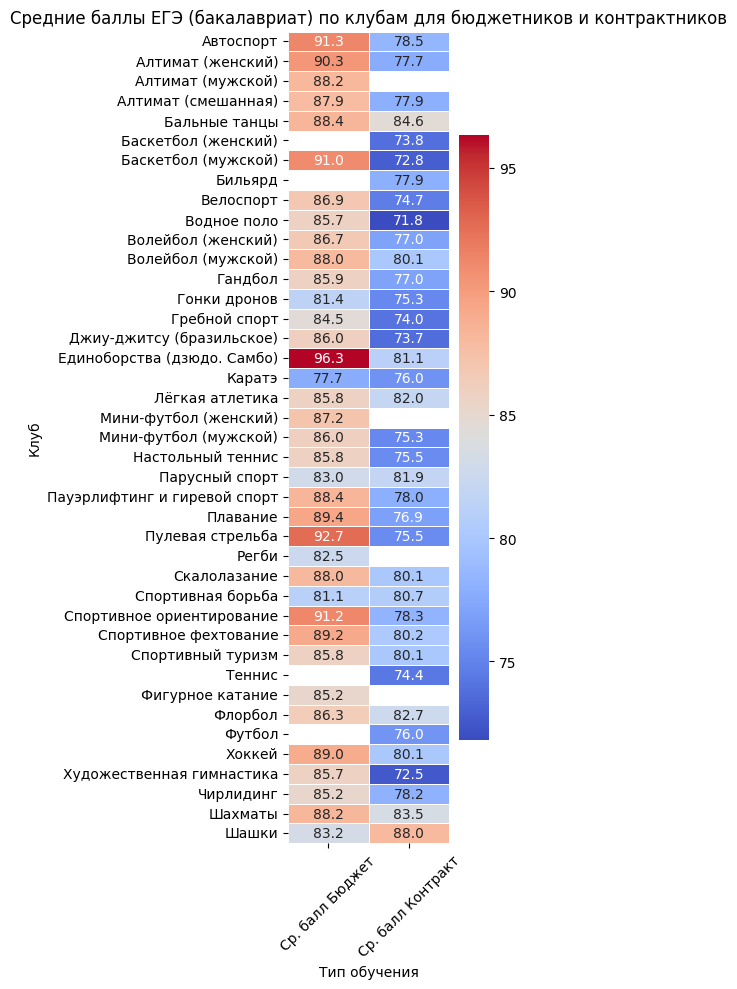

In [ ]:
df_heatmap = df_cleaned.pivot_table(
    values=["Ср. балл Бюджет", "Ср. балл Контракт"],
    index="Клуб",
    aggfunc="mean"
)

plt.figure(figsize=(5, 10))
sns.heatmap(df_heatmap, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

plt.title("Средние баллы ЕГЭ (бакалавриат) по клубам для бюджетников и контрактников")
plt.ylabel("Клуб")
plt.xlabel("Тип обучения")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

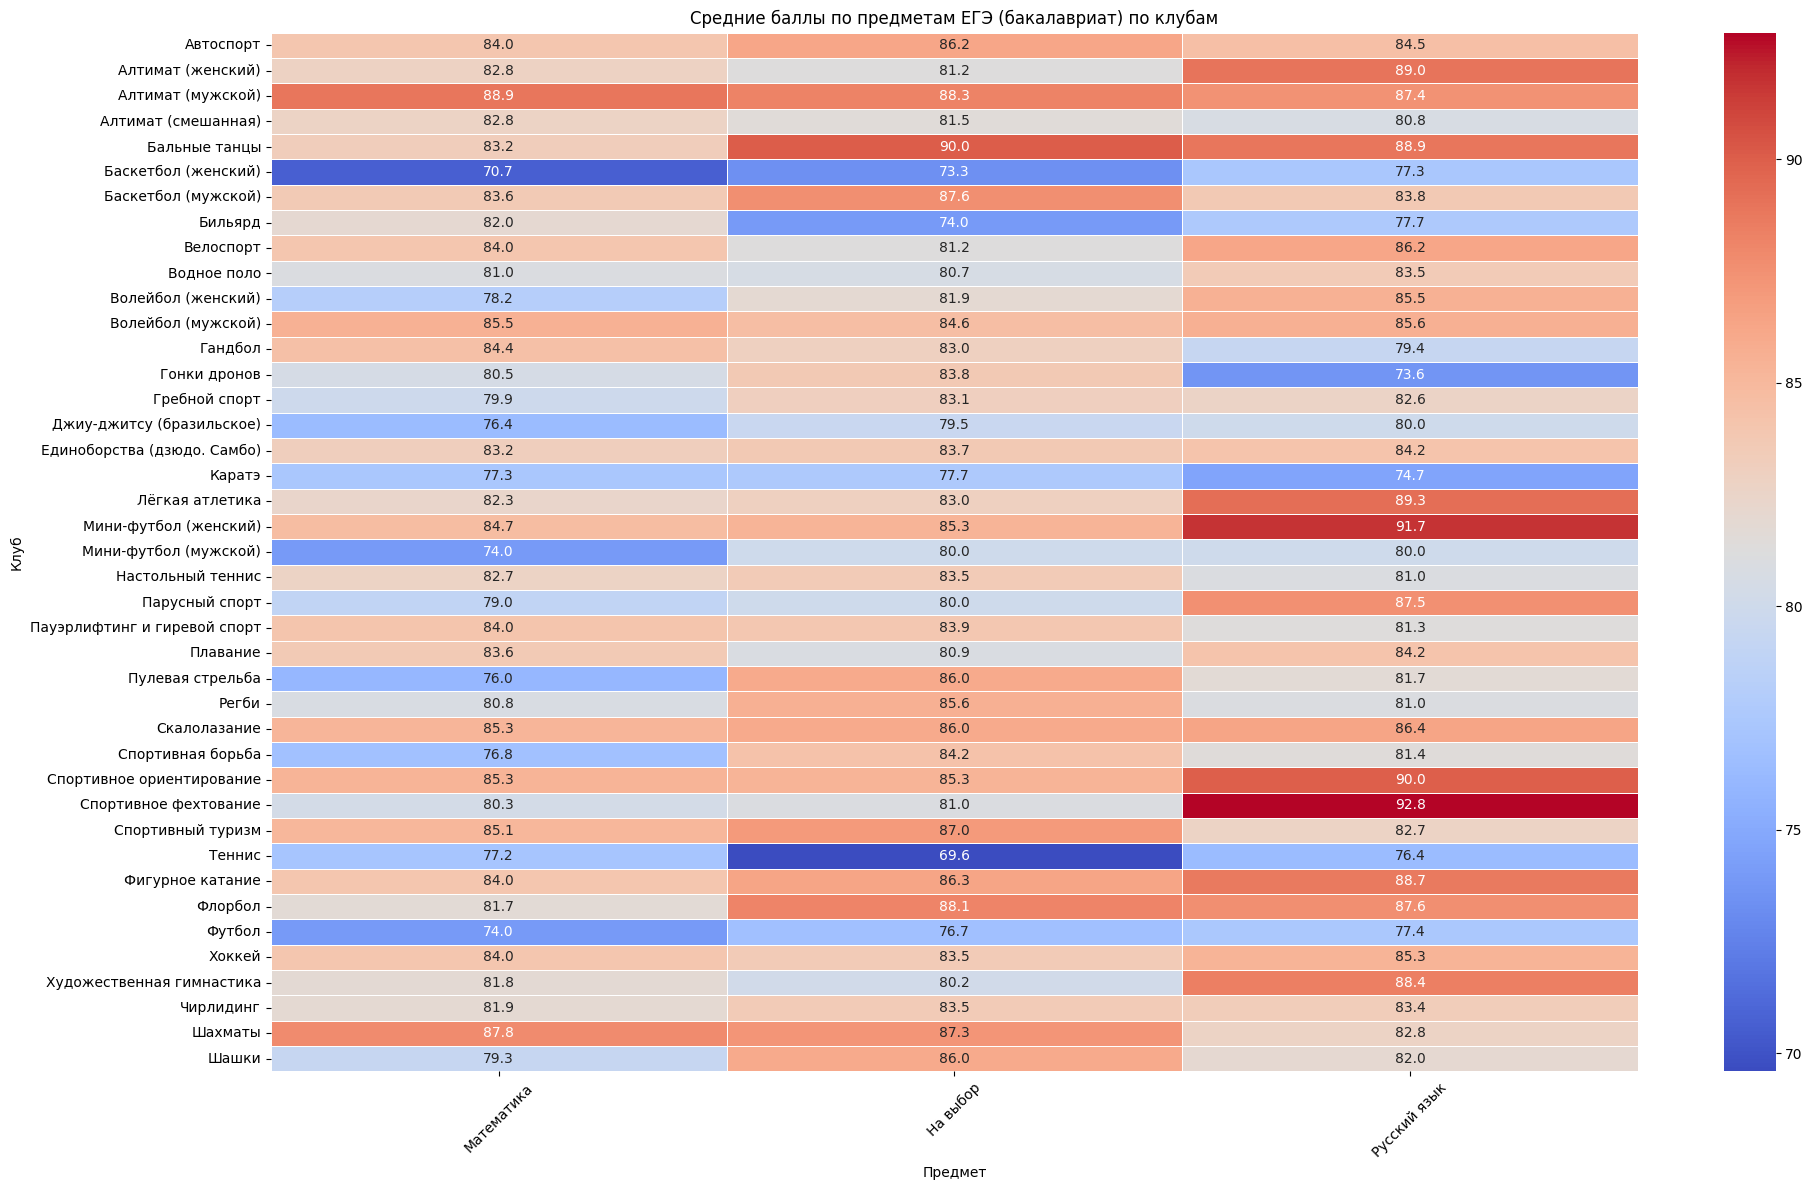

In [ ]:
df_heatmap_subjects = df_cleaned.pivot_table(
    values=["Математика", "Русский язык", "На выбор"],
    index="Клуб",
    aggfunc="mean"
)

plt.figure(figsize=(20, 12))
sns.heatmap(df_heatmap_subjects, annot=True, cmap="coolwarm", fmt=".1f", linewidths=0.5)

plt.title("Средние баллы по предметам ЕГЭ (бакалавриат) по клубам")
plt.ylabel("Клуб")
plt.xlabel("Предмет")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Анализ графиков и данных

In [ ]:
top_clubs_by_count = df_cleaned.groupby("Клуб")["Кол-во спортсменов"].sum().sort_values(ascending=False).head(5)
top_budget_percent = df_cleaned.sort_values(by="% Бюджет Всего", ascending=False)[["Клуб", "% Бюджет Всего"]].head(5)
top_contract_percent = df_cleaned.sort_values(by="% Контракт Всего", ascending=False)[["Клуб", "% Контракт Всего"]].head(5)
top_weighted_budget = df_cleaned.sort_values(by="Взвешенный % Бюджет", ascending=False)[["Клуб", "Взвешенный % Бюджет"]].head(5)
top_weighted_contract = df_cleaned.sort_values(by="Взвешенный % Контракт", ascending=False)[["Клуб", "Взвешенный % Контракт"]].head(5)
top_density_budget = df_cleaned.sort_values(by="Коэффициент плотности бюджетников", ascending=False)[["Клуб", "Коэффициент плотности бюджетников"]].head(5)

summary_df = pd.DataFrame({
    "Топ клубы по числу спортсменов": top_clubs_by_count.index,
    "Число спортсменов": top_clubs_by_count.values,
    "Топ клубы по % бюджетников": top_budget_percent["Клуб"].values,
    "% Бюджетников": top_budget_percent["% Бюджет Всего"].values,
    "Топ клубы по % контрактников": top_contract_percent["Клуб"].values,
    "% Контрактников": top_contract_percent["% Контракт Всего"].values,
    "Топ клубы по взвешенному % бюджетников": top_weighted_budget["Клуб"].values,
    "Взвешенный % Бюджетников": top_weighted_budget["Взвешенный % Бюджет"].values,
    "Топ клубы по взвешенному % контрактников": top_weighted_contract["Клуб"].values,
    "Взвешенный % Контрактников": top_weighted_contract["Взвешенный % Контракт"].values,
    "Топ клубы по плотности бюджетников": top_density_budget["Клуб"].values,
    "Коэф. плотности бюджетников": top_density_budget["Коэффициент плотности бюджетников"].values
})

summary_df

,Топ клубы по числу спортсменов,Число спортсменов,Топ клубы по % бюджетников,% Бюджетников,Топ клубы по % контрактников,% Контрактников,Топ клубы по взвешенному % бюджетников,Взвешенный % Бюджетников,Топ клубы по взвешенному % контрактников,Взвешенный % Контрактников,Топ клубы по плотности бюджетников,Коэф. плотности бюджетников
0,Бальные танцы,48.0,Мини-футбол (женский),100.000000,Теннис,83.333333,Бальные танцы,40.000000,Пауэрлифтинг и гиревой спорт,13.419355,Мини-футбол (женский),1.000000
1,Чирлидинг,46.0,Фигурное катание,100.000000,Футбол,70.000000,Спортивный туризм,38.000000,Чирлидинг,9.000000,Фигурное катание,1.000000
2,Спортивный туризм,43.0,Алтимат (мужской),100.000000,Единоборства (дзюдо. Самбо),50.000000,Чирлидинг,37.000000,Спортивная борьба,8.000000,Алтимат (мужской),1.000000
3,Гребной спорт,38.0,Регби,100.000000,Гонки дронов,50.000000,Гребной спорт,31.000000,Бальные танцы,8.000000,Регби,1.000000
4,Пауэрлифтинг и гиревой спорт,32.0,Флорбол,91.666667,Хоккей,50.000000,Пауэрлифтинг и гиревой спорт,18.580645,Плавание,7.000000,Флорбол,0.916667


Анализ показывает значительные различия в численности спортсменов по клубам


Самыми крупными клубами являются Бальные танцы (48), Чирлидинг (46), Спортивный туризм (43), Гребной спорт (38) и Пауэрлифтинг и гиревой спорт (32)

В то же время менее многочисленные клубы, как например те, которые мы исключили из анализа совсем (где количество человек варьируется от 1 до 4 не включительно), а также Фигурное катание, Велоспорт, Пулевая стрельба и Алтимат (мужской)

Что касается процентного соотношения бюджетных и контрактных мест -> оно также варьируется в зависимости от вида спорта

Полностью бюджетными являются Мини-футбол (женский), Фигурное катание, Алтимата (мужской) и Регби, соотественно 100% спортсменов обучаются за счет бюджета

В то же время самая высокая доля контрактников наблюдается в Теннисе (83.3%), Футболе (70%), Единоборствах (дзюдо, самбо – 50%), Гонках дронов (50%) и Хоккее (50%)

С учетом общего числа спортсменов, наибольшее абсолютное количество бюджетников сосредоточено в Бальных танцах (40%), Спортивном туризме (38%), Чирлидинге (37%), Гребном спорте (31%) и Пауэрлифтинге и гиревом спорте (18.5%). Это означает, что даже при доле бюджетников ниже 100%, их общее число в этих клубах велико

Наибольший взвешенный процент контрактников наблюдается в Пауэрлифтинге и гиревом спорте (13.4%), Чирлидинге (9%), Спортивной борьбе (8%), Бальных танцах (8%) и Плавании (7%). Это говорит о том, что в этих клубах значительная часть спортсменов обучается на платной основе



Коэффициент плотности бюджетников (отражает сколько бюджетных мест приходится на одного спортсмена) показывает, что в некоторых клубах практически все спортсмены обучаются на бюджете. Флорбол, Мини-футбол (женский), Фигурное катание, Алтимат (мужской) и Регби имеют коэффициент 1.0, что означает, что каждый спортсмен клуба зачислен на бюджетное место

В противоположность этому, Теннис, Футбол и Хоккей имеют самые низкие коэффициенты

Также мы можем заметить, что на уровне бакалавриата обучается значительно больше спортсменов, чем в магистратуре, что может говорить о том, что большинство спортсменов заканчивают свое участие в университетском спорте после получения бакалаской степени либо просто не продолжают обучение. Также думаю это достаточно закономерно, ведь количество студентов на бакалавриате значительно превышает магистров

Контрактное обучение также более распространено среди бакалавров


Продолжая речь о бакалаврах, анализ средних баллов ЕГЭ среди спортсменов, представленный на хитмапах показывает значительные различия между клубами, а также между бюджетниками и контрактниками
- Наибольшие средние баллы среди бюджетников наблюдаются в клубах Единоборства (дзюдо, самбо) (96.3), Пулевая стрельба (92.7), Автоспорт (91.3), Спортивное ориентирование (91.2) и Баскетбол (мужской) (91.0)
- Наименьшие средние баллы бюджетников наблюдаются у спортсменов в Флорболе (36.3), Каратэ (77.7) и Фигурном катании (85.2)


Средние баллы контрактников, напротив, распределены более равномерно, но в ряде случаев они значительно ниже, чем у бюджетников

В некоторых клубах - напротив, контрактники показывают равные или более высокие баллы

Разница отображена в таблице ниже:

In [ ]:
df_cleaned["Разница"] = df_cleaned["Ср. балл Бюджет"] - df_cleaned["Ср. балл Контракт"]

df_difference = df_cleaned[["Клуб", "Ср. балл Бюджет", "Ср. балл Контракт", "Разница"]]
df_difference_sorted = df_difference.sort_values(by="Разница", ascending=False)

df_difference_sorted

,Клуб,Ср. балл Бюджет,Ср. балл Контракт,Разница
30,Баскетбол (мужской),91.04,72.83,18.21
19,Пулевая стрельба,92.67,75.50,17.17
33,Единоборства (дзюдо. Самбо),96.33,81.13,15.20
2,Водное поло,85.71,71.83,13.88
25,Художественная гимнастика,85.74,72.50,13.24
21,Спортивное ориентирование,91.17,78.33,12.84
9,Автоспорт,91.33,78.50,12.83
5,Алтимат (женский),90.33,77.67,12.66
18,Плавание,89.43,76.86,12.57
32,Джиу-джитсу (бразильское),86.00,73.67,12.33


Если говорить более таргетированно, и рассматривать результаты ЕГЭ детальнее, то Русский язык и Предмет на выбор демонстрируют более менее равномерное распределение средних баллов, однако в Пулевой стрельбе (92.8 по русскому), Каратэ (91.7 по на выбор), Спортивном ориентировании (90.0 по на выбор) результаты являются достаточно высокими

Что касается математики -> средние баллы по математике ниже в игровых видах спорта, таких как Баскетбол (мужской) (70.7), Футбол (74.0) и Теннис(77.2)

Высокие средние баллы по математике наблюдаются в Спортивном ориентировании (85.3), Спортивном фехтовании (80.3) и Шахматах (87.8), что позволяет выдвинуть предположение о влиянии стратегического мышления на успешность сдачи этого предмета

## ГИПОТЕЗА: Средние баллы ЕГЭ у спортсменов из технически сложных видов спорта выше, чем у спортсменов из игровых командных и силовых видов спорт

Для этого разделим виды спорта на несколько категорий:

- Технические
- Командные
- Силовые и индивидуальные

In [ ]:
categories = {
    "Технические": [
        "Шахматы", "Бильярд", "Шашки", "Гонки дронов", "Спортивное фехтование",
        "Настольный теннис", "Бадминтон", "Теннис", "Парусный спорт"
    ],
    "Командные": [
        "Мини-футбол (женский)", "Мини-футбол (мужской)", "Футбол", "Баскетбол (женский)",
        "Баскетбол (мужской)", "Волейбол (женский)", "Волейбол (мужской)", "Водное поло",
        "Регби", "Гандбол", "Флорбол", "Алтимат (мужской)", "Алтимат (женский)", "Алтимат (смешанная)"
    ],
    "Силовые и индивидуальные": [
        "Каратэ", "Джиу-джитсу (бразильское)", "Единоборства (дзюдо. Самбо)", "Художественная гимнастика",
        "Спортивная борьба", "Пауэрлифтинг и гиревой спорт", "Лёгкая атлетика", "Скалолазание",
        "Гребной спорт", "Спортивный туризм", "Чирлидинг", "Спортивное ориентирование",
        "Плавание", "Бальные танцы", "Автоспорт", "Велоспорт", "Фигурное катание"
    ]
}

In [ ]:
def categorize_club(club_name):
    for category, clubs in categories.items():
        if club_name in clubs:
            return category
    return "Другие"

<Figure size 1200x600 with 0 Axes>

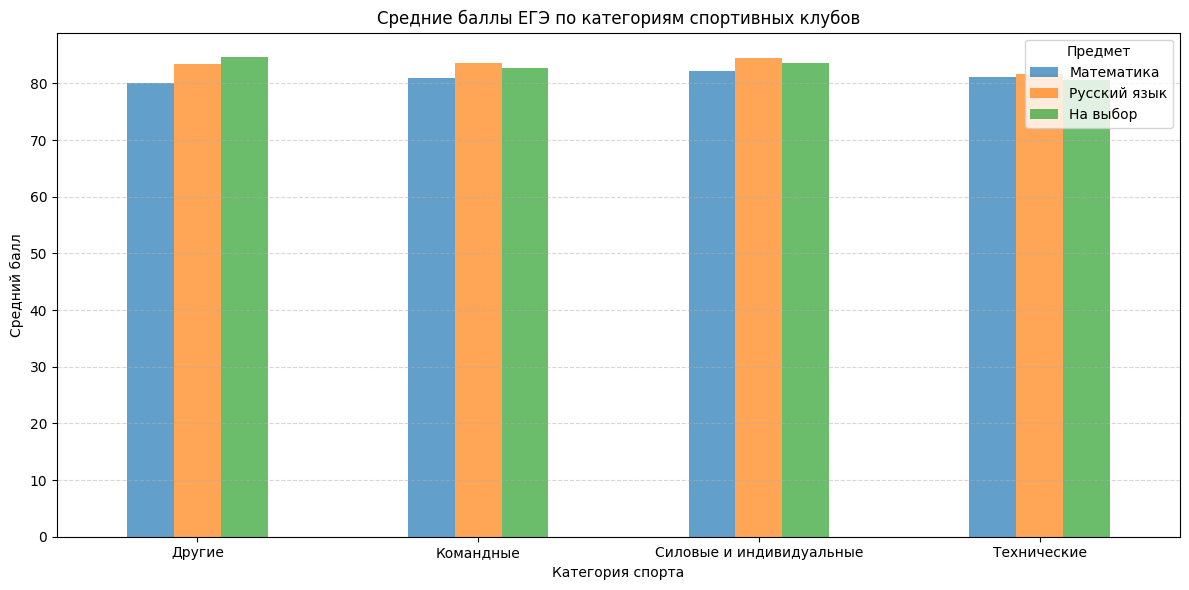

In [ ]:
df_cleaned["Категория"] = df_cleaned["Клуб"].apply(categorize_club)

category_scores = df_cleaned.groupby("Категория")[["Математика", "Русский язык", "На выбор"]].mean()

plt.figure(figsize=(12, 6))
category_scores.plot(kind="bar", figsize=(12, 6), alpha=0.7)
plt.title("Средние баллы ЕГЭ по категориям спортивных клубов")
plt.ylabel("Средний балл")
plt.xlabel("Категория спорта")
plt.xticks(rotation=0)
plt.legend(title="Предмет")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

В целом из графика видно -> что гипотеза в целом отвергается, но проведем статистический тест ANOVA чтобы посмотреть на значения, проанализируем их и сделаем окончательные выводы

In [ ]:
tech_scores = df_cleaned[df_cleaned["Категория"] == "Технические"][["Математика", "Русский язык", "На выбор"]].mean(axis=1).dropna()
team_scores = df_cleaned[df_cleaned["Категория"] == "Командные"][["Математика", "Русский язык", "На выбор"]].mean(axis=1).dropna()
power_scores = df_cleaned[df_cleaned["Категория"] == "Силовые и индивидуальные"][["Математика", "Русский язык", "На выбор"]].mean(axis=1).dropna()

anova_result = f_oneway(tech_scores, team_scores, power_scores)

anova_result

F_onewayResult(statistic=np.float64(1.2020291928530795), pvalue=np.float64(0.3123610188988843))

F = 1.20 что является очень маленьким значением, а значит у нас слабые или случайные различии между группами

также значение p-value=0,3 > 0.05 -> различия не являются статистически значимыми, и мы не можем утверждать, что категории реально разные

Так как ранее в анализе мы упоминали, что
> Высокие средние баллы по математике наблюдаются в Спортивном ориентировании (85.3), Спортивном фехтовании (80.3) и Шахматах (87.8), что позволяет выдвинуть предположение о влиянии стратегического мышления на успешность сдачи этого предмета

То попробуем рассмотреть эту гипотезу в рамках результатов ЕГЭ конкретно по математике



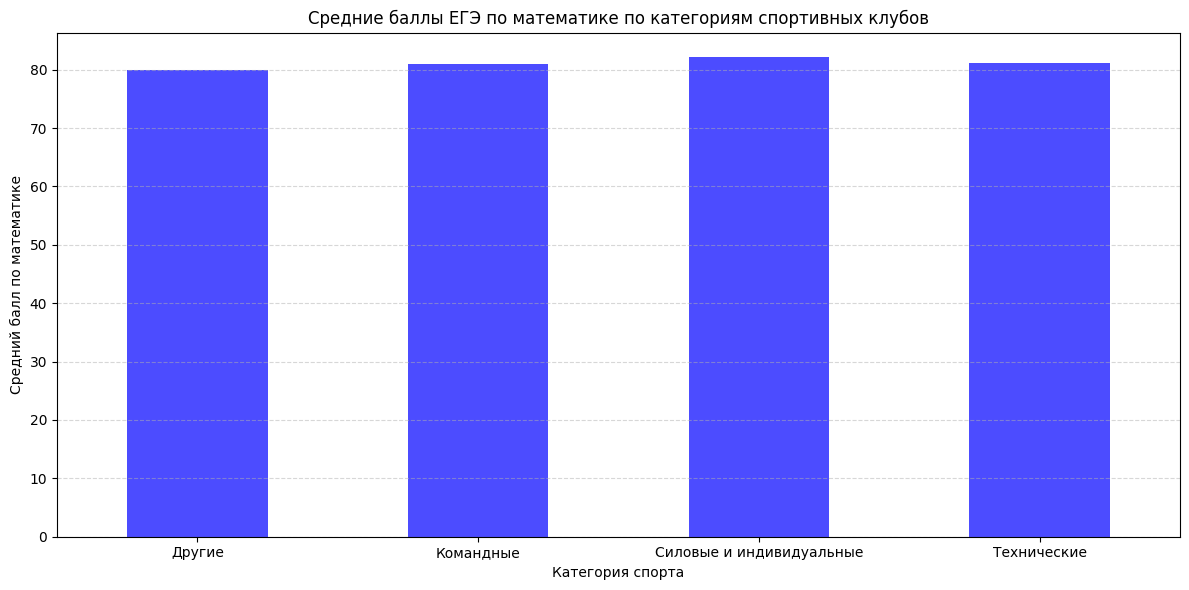

In [ ]:
category_math_scores = df_cleaned.groupby("Категория")["Математика"].mean()

plt.figure(figsize=(12, 6))
category_math_scores.plot(kind="bar", alpha=0.7, color="blue")
plt.title("Средние баллы ЕГЭ по математике по категориям спортивных клубов")
plt.ylabel("Средний балл по математике")
plt.xlabel("Категория спорта")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

Визуально, какой то сильной разницы тут нет, однако попробуем статистически проверить результаты

In [ ]:
math_budget_scores = df_cleaned["Математика"][df_cleaned["Ср. балл Бюджет"].notna()]
math_contract_scores = df_cleaned["Математика"][df_cleaned["Ср. балл Контракт"].notna()]

t_stat_math, p_value_math = ttest_ind(math_budget_scores, math_contract_scores, equal_var=False)

t_stat_math, p_value_math

(np.float64(1.128957823199795), np.float64(0.2627374437942112))

Полученные результаты также не несут никакой статистической значимости

## ГИПОТЕЗА: Командные виды спорта привлекают больше контрактников, чем индивидуальные или наоборот

Разделим все виды спорта на 2 категории

In [ ]:
team_sports = [
    "Мини-футбол (женский)", "Мини-футбол (мужской)", "Футбол", "Баскетбол (женский)",
    "Баскетбол (мужской)", "Волейбол (женский)", "Волейбол (мужской)", "Водное поло",
    "Регби", "Гандбол", "Флорбол", "Алтимат (мужской)", "Алтимат (женский)", "Алтимат (смешанная)"
]
individual_sports = [
    "Шахматы", "Бильярд", "Шашки", "Гонки дронов", "Спортивное фехтование",
    "Настольный теннис", "Бадминтон", "Теннис", "Парусный спорт",
    "Каратэ", "Джиу-джитсу (бразильское)", "Единоборства (дзюдо. Самбо)", "Художественная гимнастика",
    "Спортивная борьба", "Пауэрлифтинг и гиревой спорт", "Лёгкая атлетика", "Скалолазание",
    "Гребной спорт", "Спортивный туризм", "Чирлидинг", "Спортивное ориентирование",
    "Плавание", "Бальные танцы", "Автоспорт", "Велоспорт", "Фигурное катание"
]

In [ ]:
def sport_type(club_name):
    if club_name in team_sports:
        return "Командные"
    elif club_name in individual_sports:
        return "Индивидуальные"
    else:
        return "Другие"

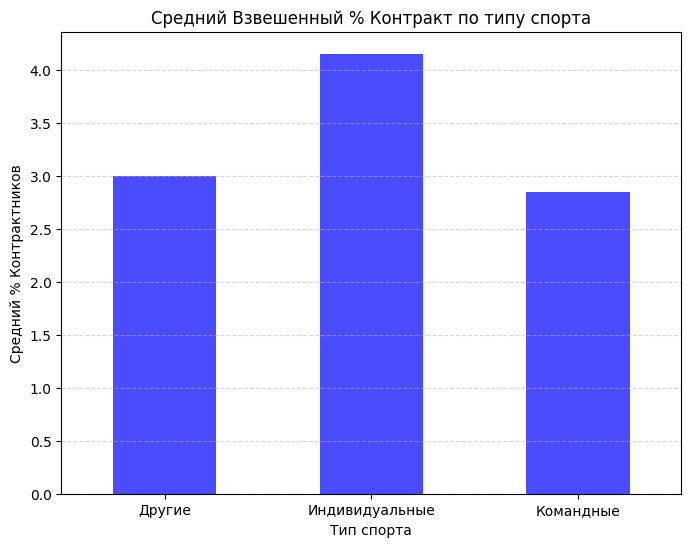

In [ ]:
df_cleaned["Тип спорта"] = df_cleaned["Клуб"].apply(sport_type)

contract_percentages = df_cleaned.groupby("Тип спорта")["Взвешенный % Контракт"].mean()

plt.figure(figsize=(8, 6))
contract_percentages.plot(kind="bar", alpha=0.7, color="blue")

plt.title("Средний Взвешенный % Контракт по типу спорта")
plt.ylabel("Средний % Контрактников")
plt.xlabel("Тип спорта")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [ ]:
team_contract = df_cleaned[df_cleaned["Тип спорта"] == "Командные"]["Взвешенный % Контракт"].dropna()
individual_contract = df_cleaned[df_cleaned["Тип спорта"] == "Индивидуальные"]["Взвешенный % Контракт"].dropna()

ttest_result = ttest_ind(team_contract, individual_contract, equal_var=False)

ttest_result

TtestResult(statistic=np.float64(-1.5359512797715666), pvalue=np.float64(0.13391569205637938), df=np.float64(33.595971895990836))

p-value=0.13 > 0.05 -> значит разница не является статистически значимой

Соответственно мы не можем утверждать, что командные виды спорта привлекают больше контрактников, чем индивидуальные, с высокой уверенностью и наоборот

Попробуем посмотреть выбросы

<ipython-input-79-206ef7e80571>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Взвешенный % Контракт"], palette=["blue", "red"])
<ipython-input-79-206ef7e80571>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Взвешенный % Контракт"], palette=["blue", "red"])


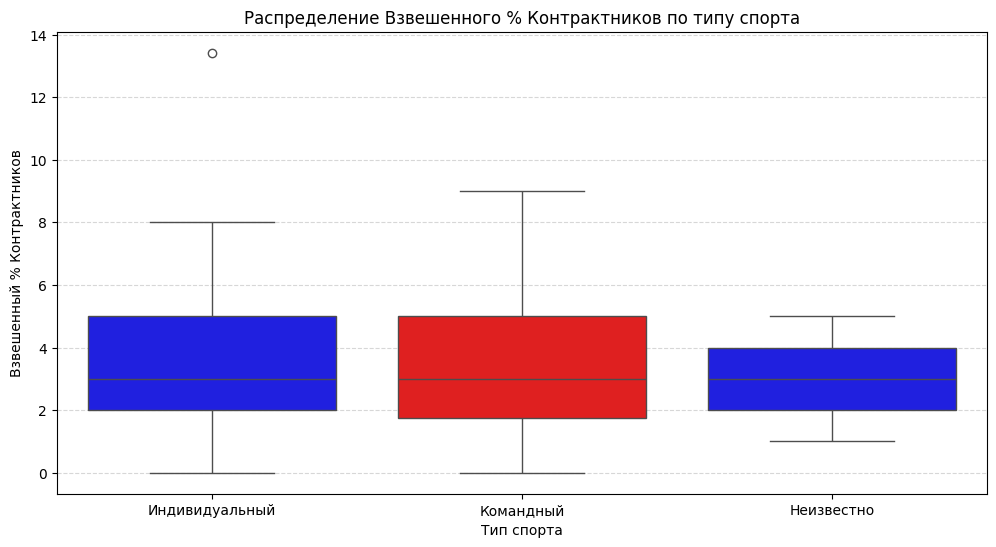

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,...,Магистратура ср. балл диплома,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников,Категория,Тип спорта,Разница,Индивидуальный вид спорта
17,Пауэрлифтинг и гиревой спорт,32.0,26.0,13.0,13.0,5.0,5.0,0.0,82.97,88.36,...,4.31,58.064516,41.935484,18.580645,13.419355,0.5625,Силовые и индивидуальные,Индивидуальный,10.33,1


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Взвешенный % Контракт"], palette=["blue", "red"])
plt.ylabel("Взвешенный % Контрактников")
plt.xlabel("Тип спорта")
plt.title("Распределение Взвешенного % Контрактников по типу спорта")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Q1_contract = df_cleaned["Взвешенный % Контракт"].quantile(0.25)
Q3_contract = df_cleaned["Взвешенный % Контракт"].quantile(0.75)
IQR_contract = Q3_contract - Q1_contract

lower_bound_contract = Q1_contract - 1.5 * IQR_contract
upper_bound_contract = Q3_contract + 1.5 * IQR_contract

outliers_contract = df_cleaned[(df_cleaned["Взвешенный % Контракт"] < lower_bound_contract) |
                               (df_cleaned["Взвешенный % Контракт"] > upper_bound_contract)]

outliers_contract

Выброс незначительный, не думаю что он сильно повлиял на результаты проверки гипотезы

## ГИПОТЕЗА: Процент бюджетников выше в индивидуальных видах спорта

In [ ]:
individual_sports_filtered = [
    "Велоспорт", "Фигурное катание", "Бадминтон", "Каратэ", "Теннис",
    "Парусный спорт", "Джиу-джитсу (бразильское)", "Гонки дронов",
    "Спортивное фехтование", "Автоспорт", "Настольный теннис",
    "Спортивное ориентирование", "Единоборства (дзюдо. Самбо)",
    "Шашки", "Скалолазание", "Бильярд", "Шахматы",
    "Художественная гимнастика", "Плавание", "Спортивная борьба",
    "Лёгкая атлетика", "Пауэрлифтинг и гиревой спорт",
    "Гребной спорт", "Чирлидинг", "Бальные танцы"
]

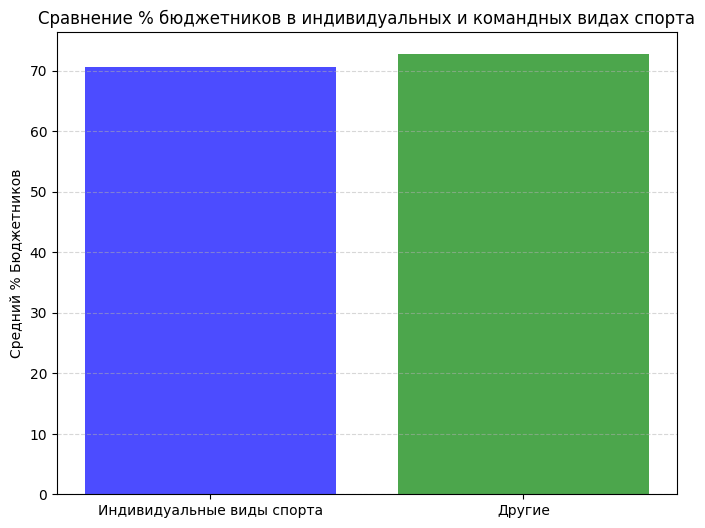

In [ ]:
df_cleaned["Индивидуальный вид спорта"] = df_cleaned["Клуб"].apply(lambda x: 1 if x in individual_sports else 0)

budget_percent_individual = df_cleaned[df_cleaned["Индивидуальный вид спорта"] == 1]["% Бюджет Всего"].mean()
budget_percent_team = df_cleaned[df_cleaned["Индивидуальный вид спорта"] == 0]["% Бюджет Всего"].mean()

plt.figure(figsize=(8, 6))
plt.bar(["Индивидуальные виды спорта", "Другие"],
        [budget_percent_individual, budget_percent_team],
        color=["blue", "green"], alpha=0.7)

plt.ylabel("Средний % Бюджетников")
plt.title("Сравнение % бюджетников в индивидуальных и командных видах спорта")
plt.grid(axis="y", linestyle="--", alpha=0.5)

plt.show()

In [ ]:
t_stat_individual, p_value_individual = ttest_ind(
    df_cleaned[df_cleaned["Индивидуальный вид спорта"] == 1]["% Бюджет Всего"].dropna(),
    df_cleaned[df_cleaned["Индивидуальный вид спорта"] == 0]["% Бюджет Всего"].dropna(),
    equal_var=False
)

t_stat_individual, p_value_individual

(np.float64(-0.351924746795095), np.float64(0.7275259830075058))

Гипотеза о том, что процент бюджетников выше в индивидуальных видах спорта, также отвергается. Разница между индивидуальными и командными видами спорта настолько мала, что она статистически не значима, вероятно это связано с тем, что мы имеем очень большую разницу в количественных характеристиках, посмотрим на выборсы:

<ipython-input-76-2d185d972f12>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Кол-во спортсменов"], palette=["blue", "red"])
<ipython-input-76-2d185d972f12>:5: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Кол-во спортсменов"], palette=["blue", "red"])


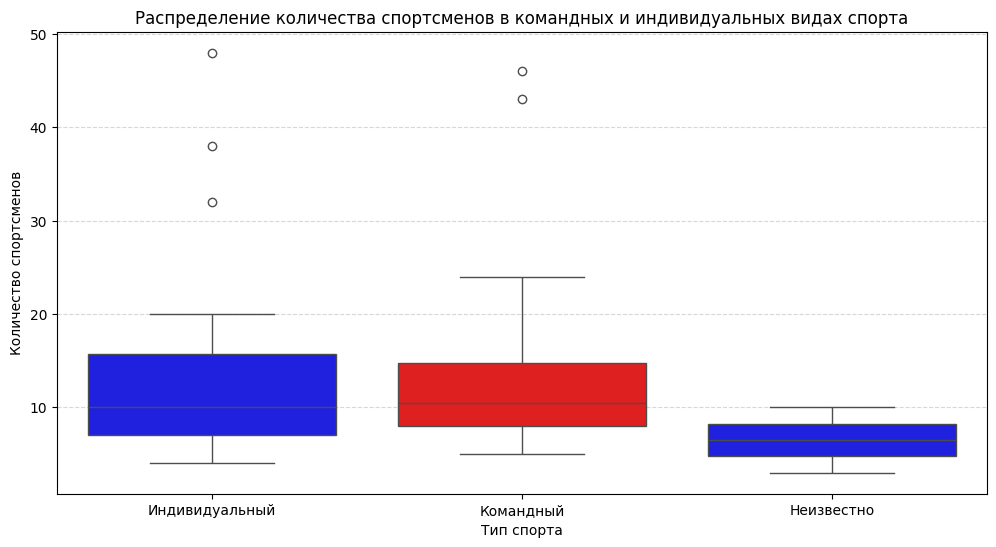

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,...,Магистратура ср. балл диплома,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников,Категория,Тип спорта,Разница,Индивидуальный вид спорта
4,Гребной спорт,38.0,27.0,20.0,7.0,11.0,11.0,0.0,81.77,84.47,...,4.52,81.578947,18.421053,31.000000,7.000000,0.815789,Силовые и индивидуальные,Индивидуальный,10.42,1
10,Бальные танцы,48.0,31.0,23.0,8.0,17.0,17.0,0.0,87.43,88.38,...,4.57,83.333333,16.666667,40.000000,8.000000,0.833333,Силовые и индивидуальные,Индивидуальный,3.81,1
17,Пауэрлифтинг и гиревой спорт,32.0,26.0,13.0,13.0,5.0,5.0,0.0,82.97,88.36,...,4.31,58.064516,41.935484,18.580645,13.419355,0.562500,Силовые и индивидуальные,Индивидуальный,10.33,1
22,Спортивный туризм,43.0,26.0,21.0,5.0,17.0,17.0,0.0,84.48,85.76,...,4.37,88.372093,11.627907,38.000000,5.000000,0.883721,Силовые и индивидуальные,Командный,5.63,1
26,Чирлидинг,46.0,31.0,22.0,9.0,15.0,15.0,0.0,82.76,85.21,...,4.53,80.434783,19.565217,37.000000,9.000000,0.804348,Силовые и индивидуальные,Командный,7.06,1


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Кол-во спортсменов"], palette=["blue", "red"])
plt.ylabel("Количество спортсменов")
plt.xlabel("Тип спорта")
plt.title("Распределение количества спортсменов в командных и индивидуальных видах спорта")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Q1 = df_cleaned["Кол-во спортсменов"].quantile(0.25)
Q3 = df_cleaned["Кол-во спортсменов"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df_cleaned[(df_cleaned["Кол-во спортсменов"] < lower_bound) | (df_cleaned["Кол-во спортсменов"] > upper_bound)]

outliers

Рассчитаем медианное количество спортсменов в командных и индивидуальных видах спорта, а также удалим выбросы

Это даст нам более достоверные результаты

In [ ]:
df_no_outliers = df_cleaned[
    (df_cleaned["Кол-во спортсменов"] >= lower_bound) & (df_cleaned["Кол-во спортсменов"] <= upper_bound)
]

median_students_team_no_outliers = df_no_outliers[df_no_outliers["Тип спорта"] == "Командный"]["Кол-во спортсменов"].median()
median_students_individual_no_outliers = df_no_outliers[df_no_outliers["Тип спорта"] == "Индивидуальный"]["Кол-во спортсменов"].median()

t_stat_no_outliers, p_value_no_outliers = ttest_ind(
    df_no_outliers[df_no_outliers["Тип спорта"] == "Командный"]["Кол-во спортсменов"].dropna(),
    df_no_outliers[df_no_outliers["Тип спорта"] == "Индивидуальный"]["Кол-во спортсменов"].dropna(),
    equal_var=False
)

t_stat_no_outliers, p_value_no_outliers

(np.float64(0.3845887315662327), np.float64(0.7036068521454174))

Даже после удаления выбросов нет доказательств, что командные виды спорта привлекают значительно больше или меньше студентов по сравнению с индивидуальными

## ГИПОТЕЗА: Командные виды спорта привлекают больше студентов, чем индивидуальные виды спорта

Определим категории командных и индивидуальных видов спорта

In [ ]:
team_sports = [
    "Мини-футбол (женский)", "Мини-футбол (мужской)", "Алтимат (женский)",
    "Алтимат (мужской)", "Алтимат (смешанная)", "Баскетбол (женский)",
    "Баскетбол (мужской)", "Футбол", "Волейбол (женский)", "Волейбол (мужской)",
    "Гандбол", "Регби", "Флорбол", "Водное поло", "Чирлидинг", "Спортивный туризм"
]

individual_sports = [
    "Велоспорт", "Фигурное катание", "Бадминтон", "Каратэ", "Теннис",
    "Парусный спорт", "Джиу-джитсу (бразильское)", "Гонки дронов",
    "Спортивное фехтование", "Автоспорт", "Настольный теннис",
    "Спортивное ориентирование", "Единоборства (дзюдо. Самбо)",
    "Шашки", "Скалолазание", "Бильярд", "Шахматы",
    "Художественная гимнастика", "Плавание", "Спортивная борьба",
    "Лёгкая атлетика", "Пауэрлифтинг и гиревой спорт",
    "Гребной спорт", "Бальные танцы"
]

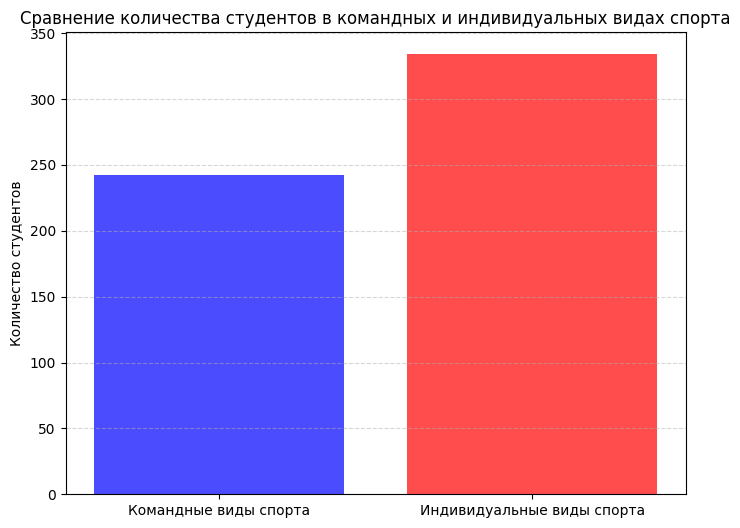

In [ ]:
df_cleaned["Тип спорта"] = df_cleaned["Клуб"].apply(
    lambda x: "Командный" if x in team_sports else ("Индивидуальный" if x in individual_sports else "Неизвестно")
)

students_team = df_cleaned[df_cleaned["Тип спорта"] == "Командный"]["Кол-во спортсменов"].sum()
students_individual = df_cleaned[df_cleaned["Тип спорта"] == "Индивидуальный"]["Кол-во спортсменов"].sum()

plt.figure(figsize=(8, 6))
plt.bar(["Командные виды спорта", "Индивидуальные виды спорта"],
        [students_team, students_individual],
        color=["blue", "red"], alpha=0.7)

plt.ylabel("Количество студентов")
plt.title("Сравнение количества студентов в командных и индивидуальных видах спорта")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [ ]:
team_students = df_cleaned[df_cleaned["Тип спорта"] == "Командный"]["Кол-во спортсменов"].dropna()
individual_students = df_cleaned[df_cleaned["Тип спорта"] == "Индивидуальный"]["Кол-во спортсменов"].dropna()

t_stat, p_value = ttest_ind(team_students, individual_students, equal_var=False)

t_stat, p_value

(np.float64(0.3161556940677969), np.float64(0.7541063043865248))

на графике видно, что индивидуальные виды спорта привлекают больше студентов, чем командные. Однако статистические тесты показывают, что разница не является значимой (p-value = 0.771) и она может быть случайной, нельзя полностью опровергнуть эту гипотезу, требует дополнительных данных для анализа

Попробуем посмотерть выбросы, связанные с количеством спортсменов

<ipython-input-80-44fc5f46a84f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Кол-во спортсменов"], palette=["blue", "red"])
<ipython-input-80-44fc5f46a84f>:2: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Кол-во спортсменов"], palette=["blue", "red"])


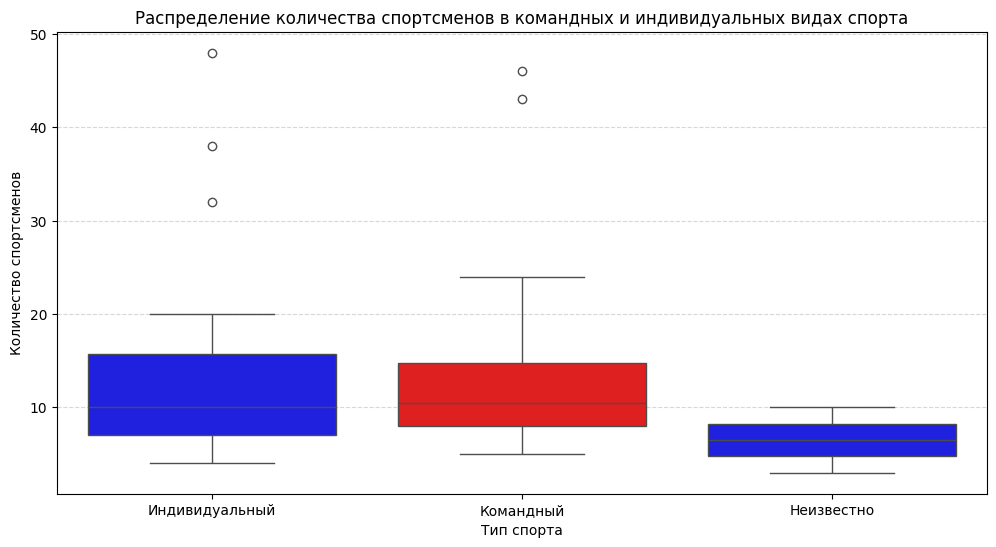

,Клуб,Кол-во спортсменов,Бакалавриат,Бюджет,Контракт,Магистратура,Бюджет.1,Контракт.1,Ср. балл Бакалавриат,Ср. балл Бюджет,...,Магистратура ср. балл диплома,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников,Категория,Тип спорта,Разница,Индивидуальный вид спорта
4,Гребной спорт,38.0,27.0,20.0,7.0,11.0,11.0,0.0,81.77,84.47,...,4.52,81.578947,18.421053,31.000000,7.000000,0.815789,Силовые и индивидуальные,Индивидуальный,10.42,1
10,Бальные танцы,48.0,31.0,23.0,8.0,17.0,17.0,0.0,87.43,88.38,...,4.57,83.333333,16.666667,40.000000,8.000000,0.833333,Силовые и индивидуальные,Индивидуальный,3.81,1
17,Пауэрлифтинг и гиревой спорт,32.0,26.0,13.0,13.0,5.0,5.0,0.0,82.97,88.36,...,4.31,58.064516,41.935484,18.580645,13.419355,0.562500,Силовые и индивидуальные,Индивидуальный,10.33,1
22,Спортивный туризм,43.0,26.0,21.0,5.0,17.0,17.0,0.0,84.48,85.76,...,4.37,88.372093,11.627907,38.000000,5.000000,0.883721,Силовые и индивидуальные,Командный,5.63,1
26,Чирлидинг,46.0,31.0,22.0,9.0,15.0,15.0,0.0,82.76,85.21,...,4.53,80.434783,19.565217,37.000000,9.000000,0.804348,Силовые и индивидуальные,Командный,7.06,1


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned["Тип спорта"], y=df_cleaned["Кол-во спортсменов"], palette=["blue", "red"])
plt.ylabel("Количество спортсменов")
plt.xlabel("Тип спорта")
plt.title("Распределение количества спортсменов в командных и индивидуальных видах спорта")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

Q1_students = df_cleaned["Кол-во спортсменов"].quantile(0.25)
Q3_students = df_cleaned["Кол-во спортсменов"].quantile(0.75)
IQR_students = Q3_students - Q1_students

lower_bound_students = Q1_students - 1.5 * IQR_students
upper_bound_students = Q3_students + 1.5 * IQR_students

outliers_students = df_cleaned[(df_cleaned["Кол-во спортсменов"] < lower_bound_students) |
                               (df_cleaned["Кол-во спортсменов"] > upper_bound_students)]

outliers_students

In [ ]:
df_no_outliers = df_cleaned[
    (df_cleaned["Кол-во спортсменов"] >= lower_bound_students) &
    (df_cleaned["Кол-во спортсменов"] <= upper_bound_students)
]

team_students_no_outliers = df_no_outliers[df_no_outliers["Тип спорта"] == "Командный"]["Кол-во спортсменов"].dropna()
individual_students_no_outliers = df_no_outliers[df_no_outliers["Тип спорта"] == "Индивидуальный"]["Кол-во спортсменов"].dropna()

t_stat_no_outliers, p_value_no_outliers = ttest_ind(
    team_students_no_outliers, individual_students_no_outliers, equal_var=False
)

t_stat_no_outliers, p_value_no_outliers

(np.float64(0.3845887315662327), np.float64(0.7036068521454174))

На результаты в пользу подтверждения гипотезы это не повлияло

## ГИПОТЕЗА: Наличие контрактников в клубах может быть связано с престижностью или стоимостью самого спорта

Выделим чисто гипотетически те виды спорта, которые на мой взгляд требуют большого количества дополнительных финансовых вложений

In [ ]:
expensive_sports = [
    "Велоспорт", "Фигурное катание", "Теннис", "Парусный спорт",
    "Автоспорт", "Гонки дронов", "Спортивное фехтование", "Художественная гимнастика"
]

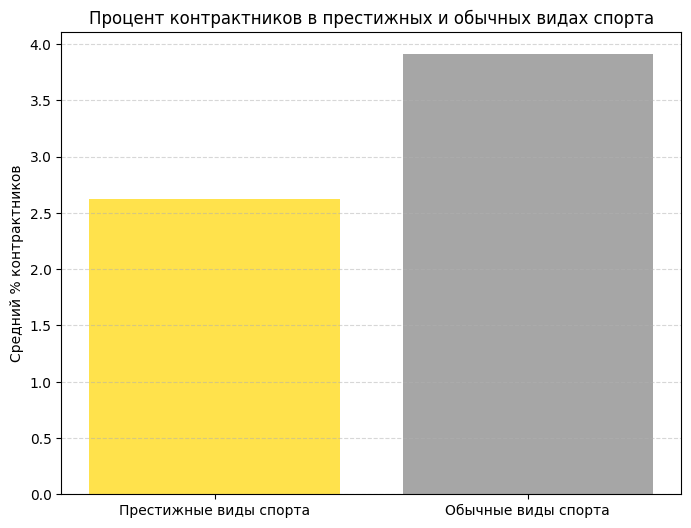

In [ ]:
df_cleaned["Престижный спорт"] = df_cleaned["Клуб"].apply(lambda x: "Престижный" if x in expensive_sports else "Обычный")

contract_percent_prestigious = df_cleaned[df_cleaned["Престижный спорт"] == "Престижный"]["Взвешенный % Контракт"].mean()
contract_percent_regular = df_cleaned[df_cleaned["Престижный спорт"] == "Обычный"]["Взвешенный % Контракт"].mean()

plt.figure(figsize=(8, 6))
plt.bar(["Престижные виды спорта", "Обычные виды спорта"],
        [contract_percent_prestigious, contract_percent_regular],
        color=["gold", "gray"], alpha=0.7)

plt.ylabel("Средний % контрактников")
plt.title("Процент контрактников в престижных и обычных видах спорта")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

In [ ]:
contract_prestigious = df_cleaned[df_cleaned["Престижный спорт"] == "Престижный"]["Взвешенный % Контракт"].dropna()
contract_regular = df_cleaned[df_cleaned["Престижный спорт"] == "Обычный"]["Взвешенный % Контракт"].dropna()

t_stat_prestige, p_value_prestige = ttest_ind(contract_prestigious, contract_regular, equal_var=False)

t_stat_prestige, p_value_prestige

(np.float64(-1.6872730345404154), np.float64(0.1069280607459741))

Глядя на график, можно заметить, что процент контрактников в обычных видах спорта выше, чем в престижных, однако t-тест показал отсутствие статистически значимой разницы (p-value = 0.107)

# Кластеризация

Выберим признаки для кластеризации

In [ ]:
features = [
    "Кол-во спортсменов", "% Бюджет Всего", "% Контракт Всего",
    "Взвешенный % Бюджет", "Взвешенный % Контракт", "Коэффициент плотности бюджетников"
]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
def objective(trial):
    n_clusters = trial.suggest_int("n_clusters", 2, 10)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)
    return silhouette_score(X_pca, labels)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

[I 2025-03-20 00:17:59,257] A new study created in memory with name: no-name-69ee0e48-af2f-4fcd-bac2-ad439e179fae
[I 2025-03-20 00:17:59,353] Trial 0 finished with value: 0.486121853780872 and parameters: {'n_clusters': 6}. Best is trial 0 with value: 0.486121853780872.
[I 2025-03-20 00:17:59,402] Trial 1 finished with value: 0.486121853780872 and parameters: {'n_clusters': 6}. Best is trial 0 with value: 0.486121853780872.
[I 2025-03-20 00:17:59,422] Trial 2 finished with value: 0.3796158626967972 and parameters: {'n_clusters': 2}. Best is trial 0 with value: 0.486121853780872.
[I 2025-03-20 00:17:59,464] Trial 3 finished with value: 0.4644321449141102 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.486121853780872.
[I 2025-03-20 00:17:59,486] Trial 4 finished with value: 0.4725662376994025 and parameters: {'n_clusters': 3}. Best is trial 0 with value: 0.486121853780872.
[I 2025-03-20 00:17:59,513] Trial 5 finished with value: 0.48523821612121054 and parameters: {'n_c

In [ ]:
best_n_clusters = study.best_params["n_clusters"]
best_n_clusters

6

In [ ]:
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42, n_init=10)
df_cleaned["Cluster"] = kmeans.fit_predict(X_pca)

df_cleaned[["Клуб", "Cluster"]]

,Клуб,Cluster
0,Бадминтон,5
1,Бильярд,5
2,Водное поло,5
3,Гандбол,5
4,Гребной спорт,0
5,Алтимат (женский),1
6,Волейбол (женский),1
7,Мини-футбол (женский),2
8,Баскетбол (женский),1
9,Автоспорт,1


Сгруппируем данные по кластерам и посчитаем средние значения ключевых признаков

In [ ]:
cluster_analysis = df_cleaned.groupby("Cluster")[
    ["Кол-во спортсменов", "% Бюджет Всего", "% Контракт Всего",
     "Взвешенный % Бюджет", "Взвешенный % Контракт", "Коэффициент плотности бюджетников"]
].mean().round(2)

cluster_analysis

,Кол-во спортсменов,% Бюджет Всего,% Контракт Всего,Взвешенный % Бюджет,Взвешенный % Контракт,Коэффициент плотности бюджетников
Cluster,,,,,,
0,43.75,83.43,16.57,36.50,7.25,0.83
1,9.44,59.41,40.59,5.54,3.89,0.59
2,7.20,98.33,1.67,7.00,0.20,0.98
3,8.00,23.33,76.67,2.00,6.00,0.23
4,32.00,58.06,41.94,18.58,13.42,0.56
5,12.79,79.80,20.20,10.20,2.59,0.77


Построим графики по всем возможным комбинациям ключевых признаков, чтобы посмотреть на закономерности в том, как наши данные были кластеризированны, визуализация поможет сделать выоды

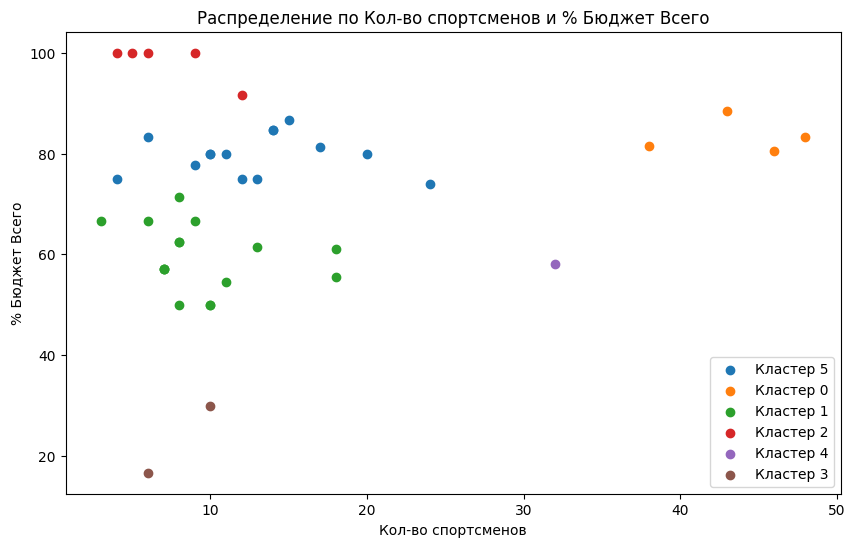

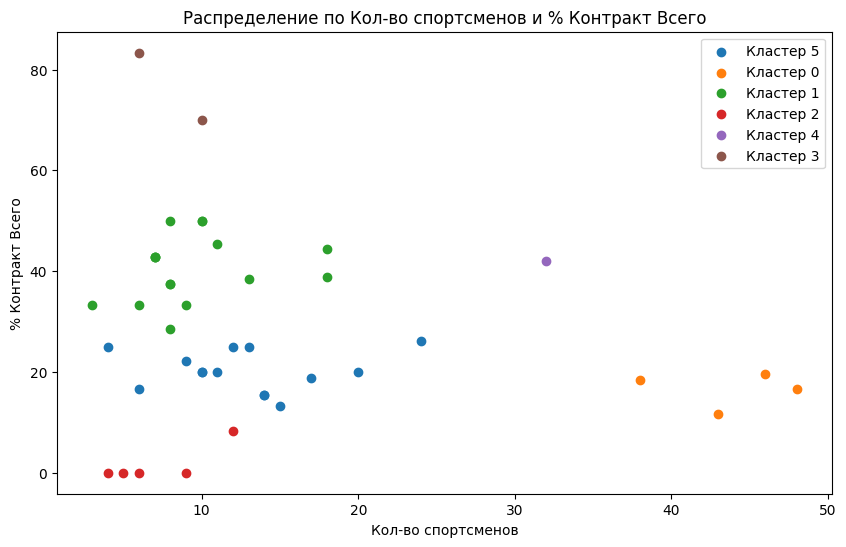

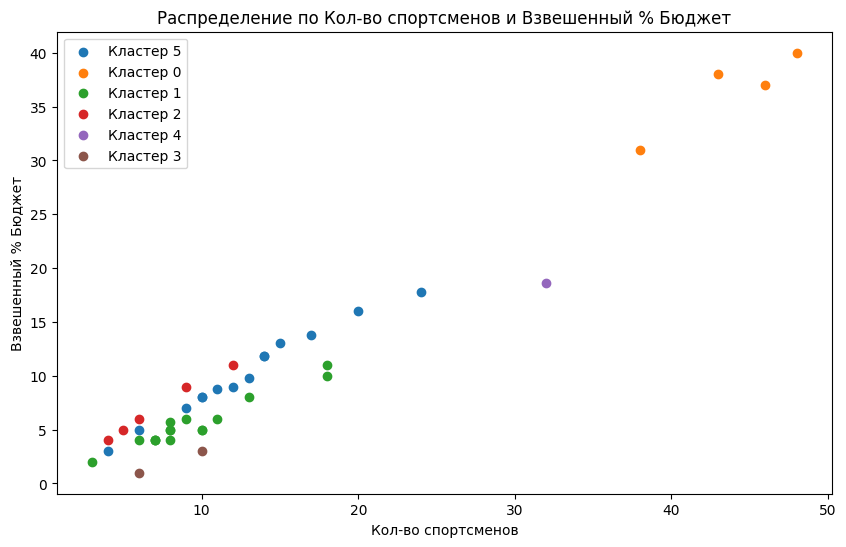

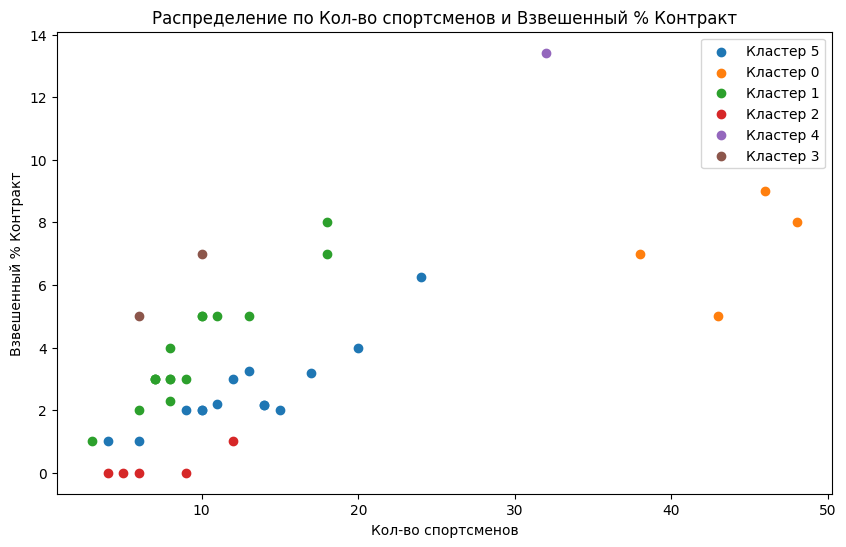

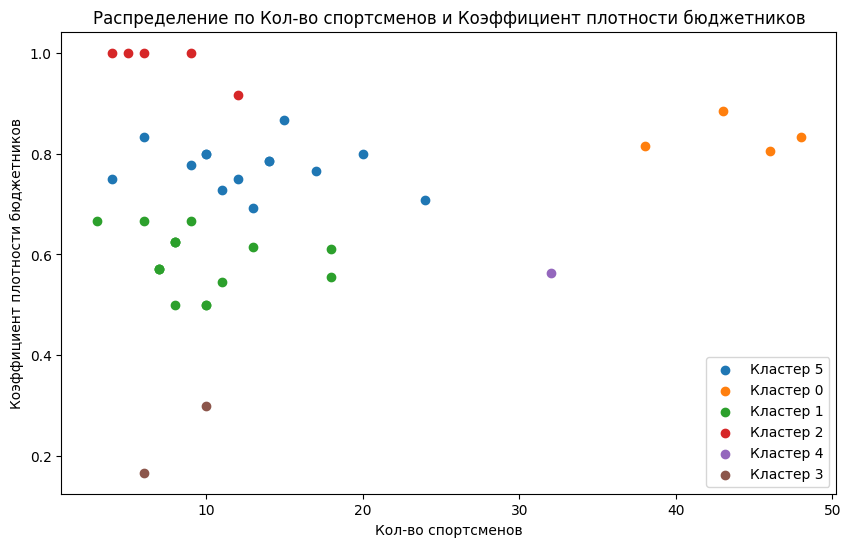

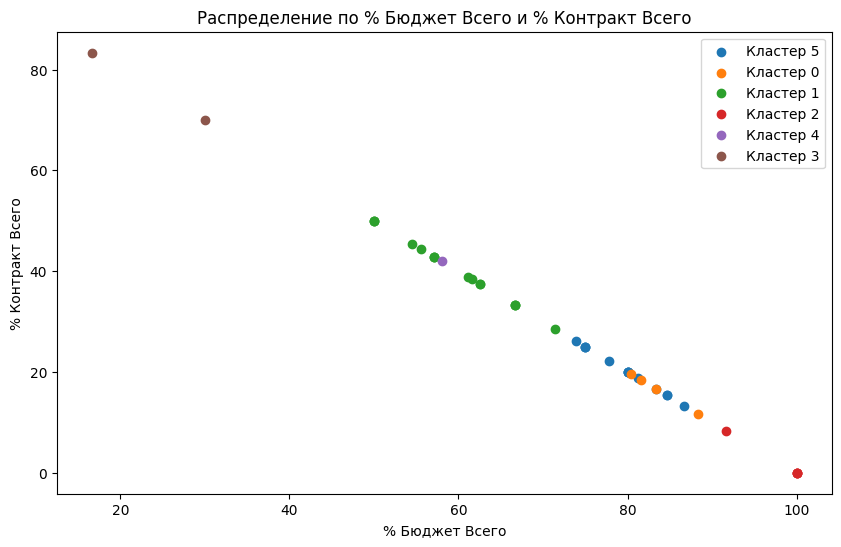

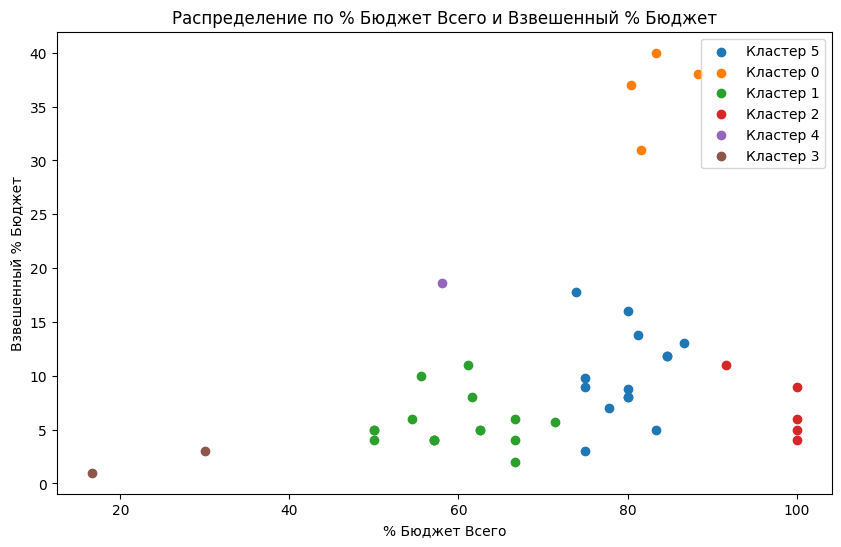

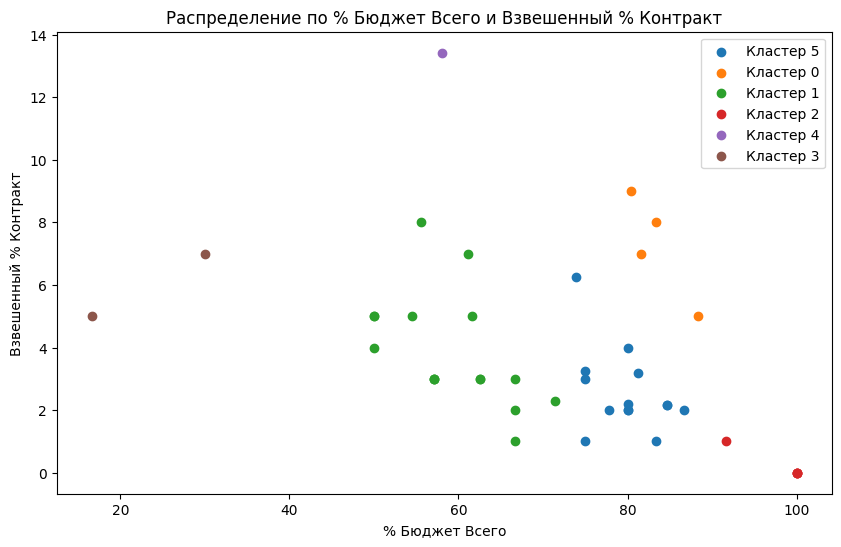

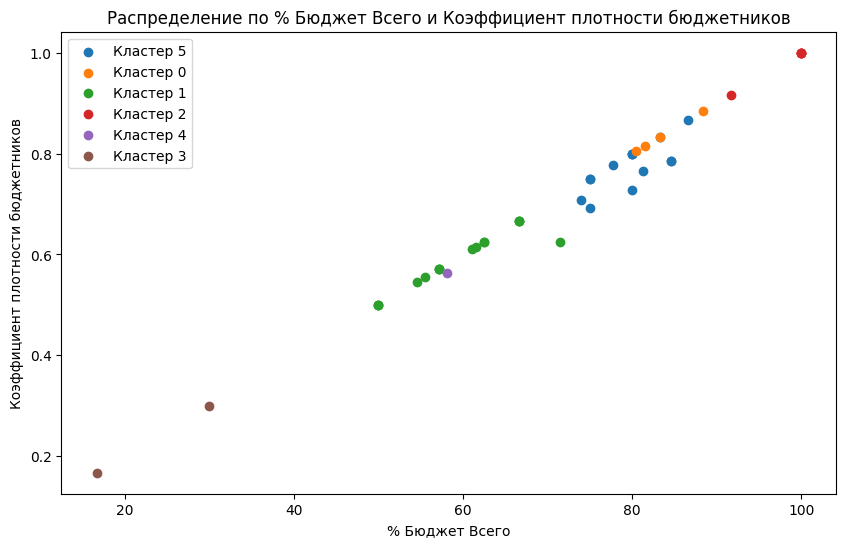

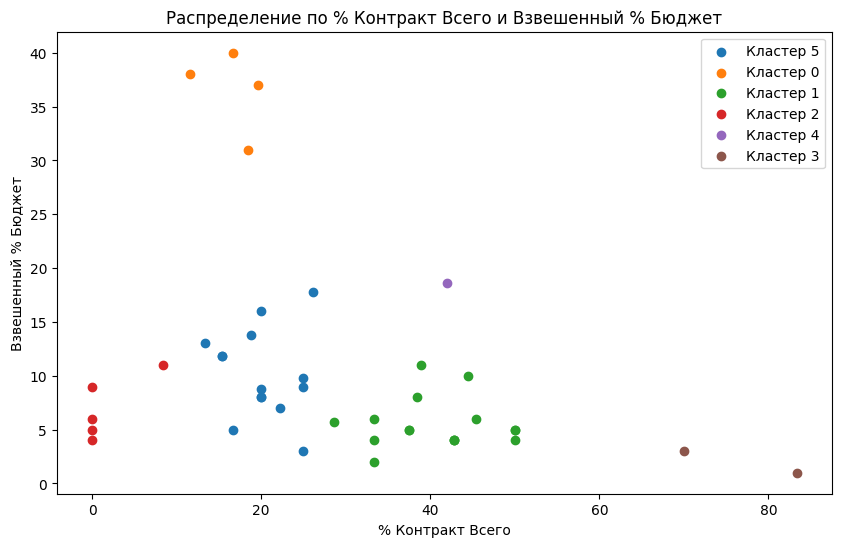

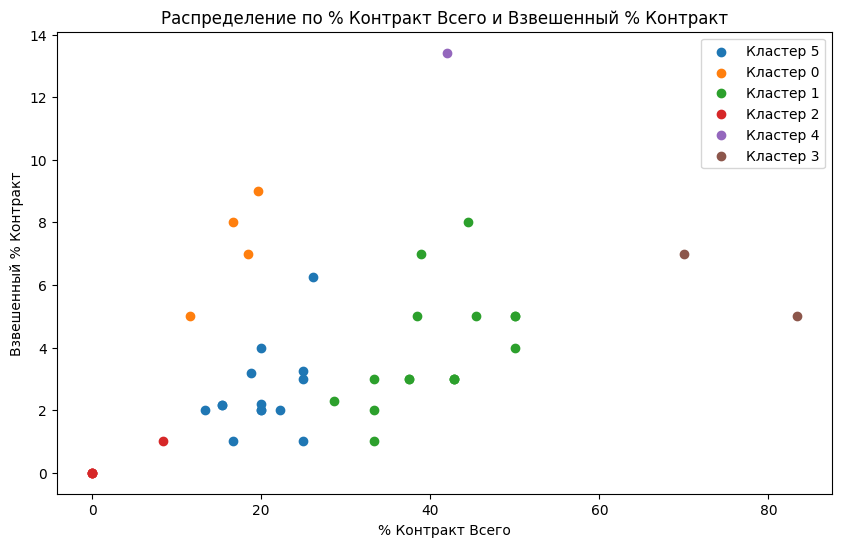

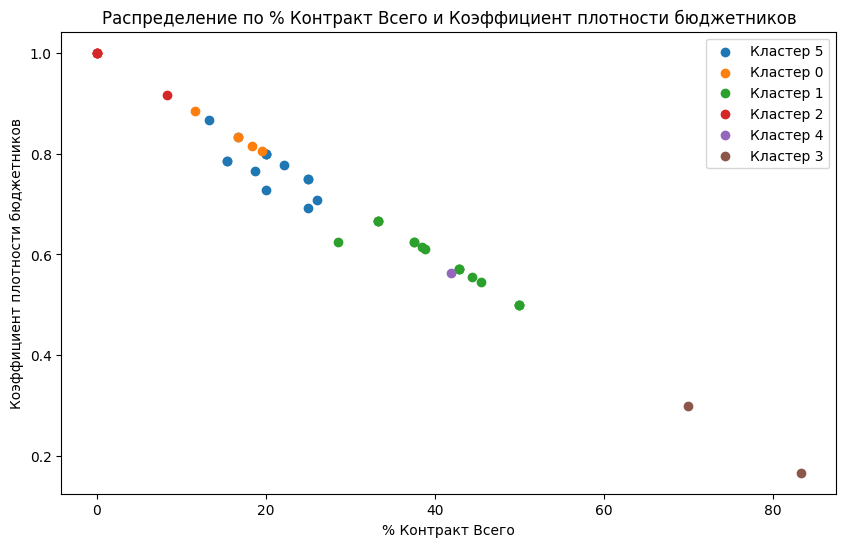

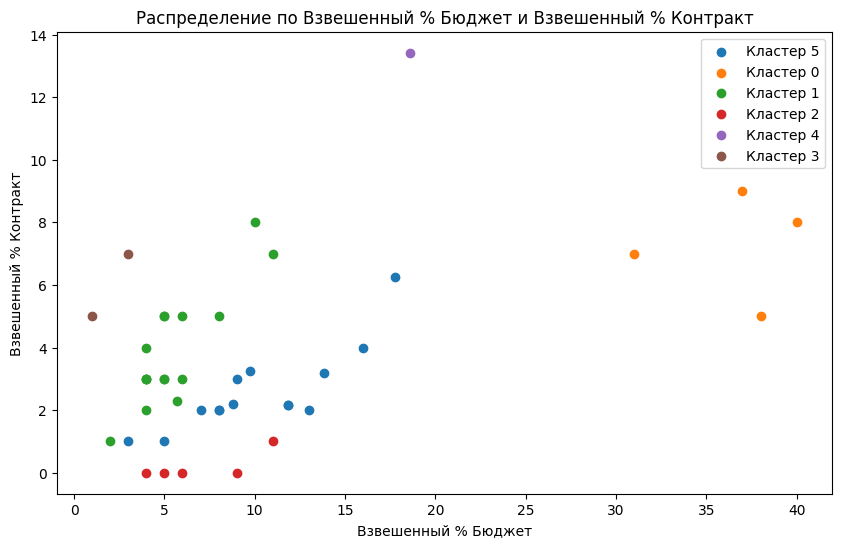

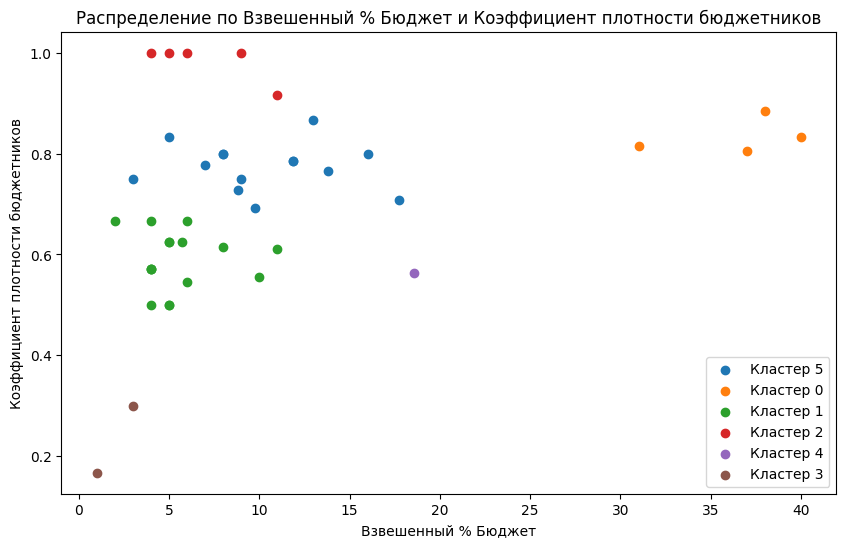

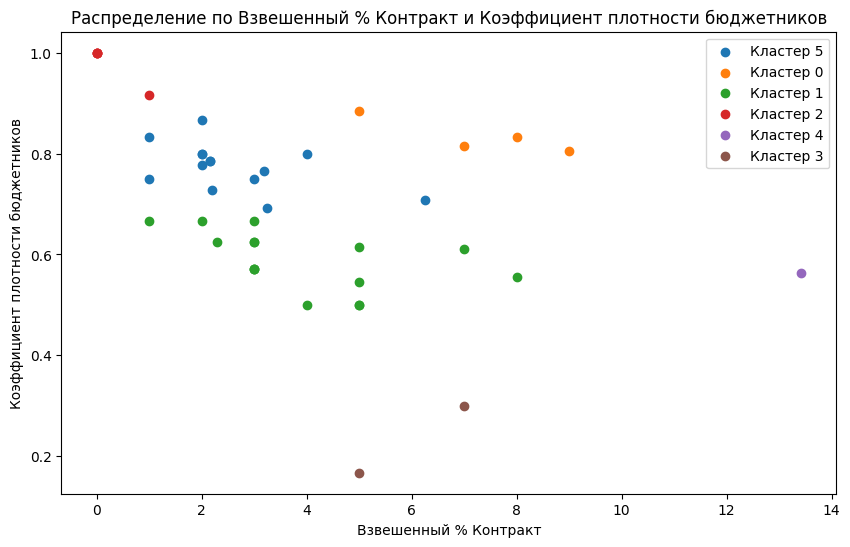

In [ ]:
feature_combinations = list(combinations([
    "Кол-во спортсменов", "% Бюджет Всего", "% Контракт Всего",
    "Взвешенный % Бюджет", "Взвешенный % Контракт", "Коэффициент плотности бюджетников"
], 2))

for x_feature, y_feature in feature_combinations:
    plt.figure(figsize=(10, 6))

    for cluster in df_cleaned["Cluster"].unique():
        cluster_data = df_cleaned[df_cleaned["Cluster"] == cluster]
        plt.scatter(cluster_data[x_feature], cluster_data[y_feature], label=f"Кластер {cluster}")

    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.title(f"Распределение по {x_feature} и {y_feature}")
    plt.legend()
    plt.show()


Рассмотрим каждый кластер по отдельности:

In [ ]:
clusters_sorted = df_cleaned[["Клуб", "Cluster"]].sort_values(by="Cluster")

## Кластер 0 - крупные сборные с высокой конкуренцией

In [ ]:
cluster_0_data = clusters_sorted[clusters_sorted["Cluster"] == 0]

cluster_0_data

,Клуб,Cluster
4,Гребной спорт,0
10,Бальные танцы,0
26,Чирлидинг,0
22,Спортивный туризм,0




- Среднее количество спортсменов: 43.75
- Бюджетники: 83.43% (очень высокая доля)
- Контрактники: 16.57%
- Коэффициент плотности бюджетников: 0.83 (высокий)

## Кластер 1 - средние сборные с балансом бюджетников и контрактников

In [ ]:
cluster_1_data = clusters_sorted[clusters_sorted["Cluster"] == 1]

cluster_1_data

,Клуб,Cluster
12,Гонки дронов,1
9,Автоспорт,1
6,Волейбол (женский),1
5,Алтимат (женский),1
16,Парусный спорт,1
29,Мини-футбол (мужской),1
18,Плавание,1
23,Спортивное фехтование,1
8,Баскетбол (женский),1
19,Пулевая стрельба,1



- Среднее количество спортсменов: 9.44
- Бюджетники: 59.41%
- Контрактники: 40.59%
- Коэффициент плотности бюджетников: 0.59 (низкий)

## Кластер 2 - маленькие сборные с почти 100% бюджетников

In [ ]:
cluster_2_data = clusters_sorted[clusters_sorted["Cluster"] == 2]

cluster_2_data

,Клуб,Cluster
31,Регби,2
24,Фигурное катание,2
27,Алтимат (мужской),2
7,Мини-футбол (женский),2
38,Флорбол,2



- Среднее количество спортсменов: 7.20 (маленькие клубы)
- Бюджетники: 98.33% (очень высокая доля)
- Контрактники: 1.67% (очень низкая доля)
- Коэффициент плотности бюджетников: 0.98 (очень высокий)

## Кластер 3 - маленькие сборные, но с высокой долей контрактников

In [ ]:
cluster_3_data = clusters_sorted[clusters_sorted["Cluster"] == 3]

cluster_3_data

,Клуб,Cluster
35,Футбол,3
37,Теннис,3



- Среднее количество спортсменов: 8.00 (маленькие клубы)
- Бюджетники: 23.33%
- Контрактники: 76.67% (максимальный показатель среди всех)
- Коэффициент плотности бюджетников: 0.23 (самый низкий показатель среди всех)

## Кластер 4 - средне-крупные сборные с умеренной долей контрактников

In [ ]:
cluster_4_data = clusters_sorted[clusters_sorted["Cluster"] == 4]

cluster_4_data

,Клуб,Cluster
17,Пауэрлифтинг и гиревой спорт,4



- Среднее количество спортсменов: 32.00
- Бюджетники: 58.06%
- Контрактники: 41.94%
- Коэффициент плотности бюджетников: 0.56

## Кластер 5 - средне-малые сборные с высокой долей бюджетников

In [ ]:
cluster_5_data = clusters_sorted[clusters_sorted["Cluster"] == 5]

cluster_5_data

,Клуб,Cluster
3,Гандбол,5
2,Водное поло,5
1,Бильярд,5
0,Бадминтон,5
30,Баскетбол (мужской),5
28,Волейбол (мужской),5
25,Художественная гимнастика,5
20,Скалолазание,5
21,Спортивное ориентирование,5
11,Велоспорт,5



- Среднее количество спортсменов: 12.79
- Бюджетники: 79.80%
- Контрактники: 20.20%
- Коэффициент плотности бюджетников: 0.77

# Анализ данных по кластерам

## ГИПОТЕЗА: Сборные с разным процентом бюджетников имеют разные структуры

Допустим мы предположим, что в сборных, где много бюджетников, может быть высокая конкуренция, а в сборных, где много контрактников, может быть гибкая система набора

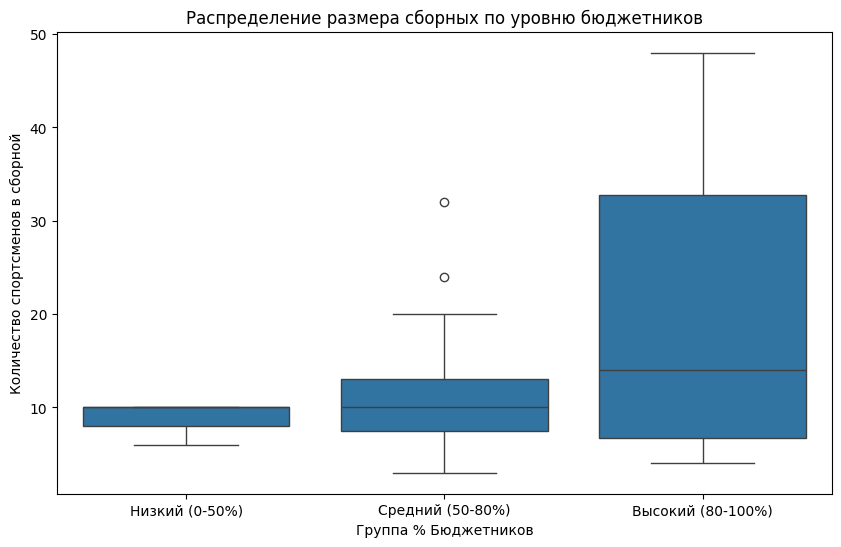

In [ ]:
df_cleaned["Группа % Бюджетников"] = pd.cut(df_cleaned["% Бюджет Всего"],
                                            bins=[0, 50, 80, 100],
                                            labels=["Низкий (0-50%)", "Средний (50-80%)", "Высокий (80-100%)"])

plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned["Группа % Бюджетников"], y=df_cleaned["Кол-во спортсменов"])
plt.xlabel("Группа % Бюджетников")
plt.ylabel("Количество спортсменов в сборной")
plt.title("Распределение размера сборных по уровню бюджетников")

plt.show()


In [ ]:
low_budget = df_cleaned[df_cleaned["Группа % Бюджетников"] == "Низкий (0-50%)"]["Кол-во спортсменов"]
mid_budget = df_cleaned[df_cleaned["Группа % Бюджетников"] == "Средний (50-80%)"]["Кол-во спортсменов"]
high_budget = df_cleaned[df_cleaned["Группа % Бюджетников"] == "Высокий (80-100%)"]["Кол-во спортсменов"]

anova_result = f_oneway(low_budget, mid_budget, high_budget)

correlation, p_value = pearsonr(df_cleaned["Кол-во спортсменов"], df_cleaned["% Бюджет Всего"])

anova_result, (correlation, p_value)

(F_onewayResult(statistic=np.float64(3.165677031987539), pvalue=np.float64(0.05320903065865617)),
 (np.float64(0.1756307278478327), np.float64(0.26590503449368397)))

Мы видим некоторую разницу в количестве спортсменов между группами бюджетников, но разброс значительный, и визуально нет четкой тенденции, что сборные с большим числом бюджетников обязательно крупнее

С точки зрения статистики, есть очень слабая положительная корреляция, различия статистически незначимы, а соответственно нет строгого подтверждения, что процент бюджетников влияет на размер сборной